In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/final-feature-new-label/final_feature_new_label.csv
/kaggle/input/fplblhehe/final_feature_final_label.csv
/kaggle/input/final-feature-maszul/final_feature_maszul.csv
/kaggle/input/fashion-campus/click_stream.csv
/kaggle/input/fashion-campus/click_stream_new.csv
/kaggle/input/fashion-campus/product.csv
/kaggle/input/fashion-campus/transaction_new.csv
/kaggle/input/fashion-campus/customer.csv
/kaggle/input/fashion-campus/transactions.csv
/kaggle/input/nlnhehe/final_feature_final_nonlabel.csv


In [2]:
#Because there will large columns in a table, we are set maximum 100 columns
pd.set_option('display.max_columns', 100)

# 1. Read data

In [5]:
click_stream = pd.read_csv('../input/fashion-campus/click_stream.csv')
customers = pd.read_csv('../input/fashion-campus/customer.csv')
products = pd.read_csv('../input/fashion-campus/product.csv', on_bad_lines='skip')
transactions = pd.read_csv('../input/fashion-campus/transactions.csv')

# 2. Labeling

In [4]:
#Let's filter data who mades success transaction
transactions_success = transactions[transactions['payment_status'] == 'Success']

#Remove qoutes in in product_metadata
import ast

transactions_success['product_metadata'] = transactions_success['product_metadata'].apply(ast.literal_eval)
transactions_success[['product_metadata']]

#Remove list in each row in product_metadata
transactions_success = transactions_success.explode('product_metadata')

#Crack and create new columns
transactions_success1 = pd.concat([transactions_success.drop(['product_metadata'], axis=1), transactions_success['product_metadata'].apply(pd.Series)], axis=1)

transactions_success1.reset_index(drop = True, inplace = True)
transactions_success1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201030,2020-11-12T18:19:20.074873Z,25121,7fdc05d1-234b-4889-a343-587ffc0635d5,33c3bf4f-0f24-4eb8-879d-906bf7e7736a,Debit Card,Success,0,NaN,10000,2020-11-18T18:06:06.493534Z,-6.286732,106.902229,287688,42915,1,277688
1201031,2021-12-09T07:35:18.222046Z,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,-8.677264,115.176947,359203,19394,1,354213
1201032,2021-12-11T01:20:36.944593Z,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12T13:28:22.848703Z,-6.185498,106.831093,1158159,13079,4,288835
1201033,2019-12-18T11:01:09.623382Z,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,Credit Card,Success,4503,AZ2022,0,2019-12-23T22:56:46.831720Z,-7.155977,110.891858,184143,11312,1,188646


In [5]:
# Let's merge table to picture better understanding
customers_trans = customers.merge(transactions_success1, on = 'customer_id', how = 'left')
customers_trans

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,created_at,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,2020-08-23T12:53:12.916342Z,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,LinkAja,Success,2853.0,WEEKENDSERU,15000.0,2020-08-26T05:14:04.908999Z,0.621070,111.101844,844751.0,18015.0,1.0,305982.0
3,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,2020-08-23T12:53:12.916342Z,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,LinkAja,Success,2853.0,WEEKENDSERU,15000.0,2020-08-26T05:14:04.908999Z,0.621070,111.101844,844751.0,2401.0,2.0,263311.0
4,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,2020-08-31T13:34:59.916342Z,eed52035-1f80-422c-b0ac-a1c814e77bcf,82396d8d-7d8a-436d-8e14-75f24aa35faa,LinkAja,Success,0.0,NaN,10000.0,2020-09-04T05:49:01.977704Z,-6.281795,106.890417,391341.0,12449.0,1.0,381341.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250788,40573,Yani,Usada,f5a2ab29-481d-49e6-960e-cb864ee1ed5a,f5a2ab29_481d_49e6_960e_cb864ee1ed5a@startupca...,F,1987-09-10,Android,b6bc29e0-5a22-47af-b31e-0972aafd4cab,Android 3.2.6,-6.524369,106.283232,Banten,Indonesia,2021-07-17,2021-10-21T15:43:07.139547Z,6b4f439a-f515-44d3-9377-936514a3d116,6f9a4b7c-c028-464d-a0ee-7efab3e83f65,Credit Card,Success,0.0,NaN,10000.0,2021-10-24T08:18:20.393551Z,-7.179850,110.039105,311938.0,48507.0,2.0,150969.0
1250789,40573,Yani,Usada,f5a2ab29-481d-49e6-960e-cb864ee1ed5a,f5a2ab29_481d_49e6_960e_cb864ee1ed5a@startupca...,F,1987-09-10,Android,b6bc29e0-5a22-47af-b31e-0972aafd4cab,Android 3.2.6,-6.524369,106.283232,Banten,Indonesia,2021-07-17,2022-01-23T19:01:48.139547Z,65367fff-1522-4c80-a0f7-1306676bd947,4bb58af9-b2df-4c48-bcb7-d68749625cee,Credit Card,Success,4532.0,WEEKENDSERU,10000.0,2022-01-26T01:41:11.712735Z,-6.286999,106.838482,110483.0,42935.0,1.0,105015.0
1250790,40573,Yani,Usada,f5a2ab29-481d-49e6-960e-cb864ee1ed5a,f5a2ab29_481d_49e6_960e_cb864ee1ed5a@startupca...,F,1987-09-10,Android,b6bc29e0-5a22-47af-b31e-0972aafd4cab,Android 3.2.6,-6.524369,106.283232,Banten,Indonesia,2021-07-17,2022-03-11T19:03:09.139547Z,7df40e00-5e2c-40c5-99f7-0e451ca82de4,a9c839a8-f945-4edb-b262-1d9196e2f827,Credit Card,Success,0.0,NaN,25000.0,2022-03-14T02:16:33.321801Z,0.583145,113.530523,276290.0,54808.0,1.0,251290.0
1250791,40573,Yani,Usada,f5a2ab29-481d-4

In [6]:
cust_unique = customers_trans.drop_duplicates('customer_id')
cust_unique

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,created_at,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,2020-08-23T12:53:12.916342Z,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,LinkAja,Success,2853.0,WEEKENDSERU,15000.0,2020-08-26T05:14:04.908999Z,0.621070,111.101844,844751.0,18015.0,1.0,305982.0
107,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11,2021-04-16T09:20:03.134253Z,71d9dae3-d587-4d46-b652-aead7d143e49,9b376c3b-c4bc-4a03-bdb9-2925f2cc3a00,OVO,Success,0.0,NaN,0.0,2021-04-18T03:57:39.966551Z,-2.980807,114.924675,115702.0,18881.0,1.0,115702.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250538,34743,Manah,Mustofa,bf989ab1-d7eb-4ad5-b4bc-29e3cf69b35c,bf989ab1_d7eb_4ad5_b4bc_29e3cf69b35c@startupca...,M,2000-11-17,Android,fa1914a5-0c12-4393-8d6c-af4e4a4de6aa,Android 4.3.1,-5.203523,105.635530,Lampung,Indonesia,2020-10-17,2020-10-17T00:55:37.213881Z,e60bed28-8a54-4b8e-a8d0-fe35ca1b232e,20123b9a-2d02-4b7c-9366-6ad87d29773c,Credit Card,Success,0.0,NaN,10000.0,2020-10-22T04:30:34.741354Z,-7.811731,110.376475,635402.0,58794.0,1.0,625402.0
1250581,72065,Danu,Pradana,4af2b3d5-c573-4032-b29c-24782745a2f6,4af2b3d5_c573_4032_b29c_24782745a2f6@startupca...,M,1998-03-30,Android,d8234d67-6954-4e05-8293-d37ef25bfd7e,Android 8.0.0,4.474702,95.904876,Aceh,Indonesia,2017-11-25,2017-11-25T10:01:26.603013Z,6de575d6-560c-4cf3-a82e-af051f470c3e,e37bc234-fea3-4d37-9485-06ec3a5d0e97,Gopay,Success,0.0,NaN,10000.0,2017-12-01T05:15:48.058341Z,-6.932625,109.778963,179289.0,36066.0,1.0,169289.0
1250628,32818,Talia,Aryani,af0edbfa-f354-4765-813b-b9f151022555,af0edbfa_f354_4765_813b_b9f151022555@startupca...,F,1993-01-12,Android,3c586f64-aab7-4dd6-be94-5d47c6361081,Android 11,-3.330376,127.028348,Maluku,Indonesia,2018-09-01,2018-09-02T22:09:31.257434Z,daf15687-045e-423c-bbdb-ea162805f422,2701977c-14c2-4b7d-9de2-7250326e14db,Credit Card,Success,2845.0,WEEKENDSERU,15000.0,2018-09-04T06:48:38.252482Z,-6.185459,106.728608,623107.0,14906.0,1.0,445308.0
1250785,75597,Ajimat,Mansur,35cd82f3-6b86-42a2-bb15-933770d7f250,35cd82f3_6b86_42a2_bb15_933770d7f250@startupca...,M,2000-09-13,Android,3b209c58-d305-4b46-9363-b90a3914f008,Android 7.1,-2.173114,101.495913,Jambi,Indo

In [7]:
# Let's merge table to picture better understanding
customers_trans = customers.merge(transactions_success1, on = 'customer_id', how = 'left')

# Convert object type in created_at columns to datetime with format year-month
customers_trans['created_at'] = pd.to_datetime(customers_trans['created_at'])
customers_trans['created_at'] = customers_trans['created_at'].dt.strftime('%Y-%m-%d')

# There 49758 customers does not have transaction, exclude fail transaction, so I ignore them.
customers_trans = customers_trans[~customers_trans['booking_id'].isnull()]

# Display the table
customers_trans

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,created_at,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,2020-08-23,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,LinkAja,Success,2853.0,WEEKENDSERU,15000.0,2020-08-26T05:14:04.908999Z,0.621070,111.101844,844751.0,18015.0,1.0,305982.0
3,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,2020-08-23,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,LinkAja,Success,2853.0,WEEKENDSERU,15000.0,2020-08-26T05:14:04.908999Z,0.621070,111.101844,844751.0,2401.0,2.0,263311.0
4,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,2020-08-31,eed52035-1f80-422c-b0ac-a1c814e77bcf,82396d8d-7d8a-436d-8e14-75f24aa35faa,LinkAja,Success,0.0,NaN,10000.0,2020-09-04T05:49:01.977704Z,-6.281795,106.890417,391341.0,12449.0,1.0,381341.0
5,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,2020-09-08,af568d06-c819-4ab4-a3e8-06857786ba10,348cc997-480b-467e-a502-1eed0f611e9d,LinkAja,Success,0.0,NaN,0.0,2020-09-14T11:26:20.142928Z,-8.631607,116.428436,154220.0,25820.0,1.0,154220.0
6,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,2020-09-16,d8c8337c-ef09-4ed3-801a-3e5fd22c3d8d,70d1c010-60e4-440a-80df-9efb0132cfb7,Debit Card,Success,0.0,NaN,10000.0,2020-09-19T22:38:44.292440Z,0.825219,123.396780,412502.0,25157.0,1.0,247557.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250788,40573,Yani,Usada,f5a2ab29-481d-49e6-960e-cb864ee1ed5a,f5a2ab29_481d_49e6_960e_cb864ee1ed5a@startupca...,F,1987-09-10,Android,b6bc29e0-5a22-47af-b31e-0972aafd4cab,Android 3.2.6,-6.524369,106.283232,Banten,Indonesia,2021-07-17,2021-10-21,6b4f439a-f515-44d3-9377-936514a3d116,6f9a4b7c-c028-464d-a0ee-7efab3e83f65,Credit Card,Success,0.0,NaN,10000.0,2021-10-24T08:18:20.393551Z,-7.179850,110.039105,311938.0,48507.0,2.0,150969.0
1250789,40573,Yani,Usada,f5a2ab29-481d-49e6-960e-cb864ee1ed5a,f5a2ab29_481d_49e6_960e_cb864ee1ed5a@startupca...,F,1987-09-10,Android,b6bc29e0-5a22-47af-b31e-0972aafd4cab,Android 3.2.6,-6.524369,106.283232,Banten,Indonesia,2021-07-17,2022-01-23,65367fff-1522-4c80-a0f7-1306676bd947,4bb58af9-b2df-4c48-bcb7-d68749625cee,Credit Card,Success,4532.0,WEEKENDSERU,10000.0,2022-01-26T01:41:11.712735Z,-6.286999,106.838482,110483.0,42935.0,1.0,105015.0
1250790,40573,Yani,Usada,f5a2ab29-481d-49e6-960e-cb864ee1ed5a,f5a2ab29_481d_49e6_960e_cb864ee1ed5a@startupca...,F,1987-09-10,Android,b6bc29e0-5a22-47af-b31e-0972aafd4cab,Android 3.2.6,-6.524369,106.283232,Banten,Indonesia,2021-07-17,2022-03-11,7df40e00-5e2c-40c5-99f7-0e

In [8]:
# Let's grouping table so we can create new columns with aggregation
customers_trans1 = customers_trans.groupby(['customer_id', 'created_at', 'booking_id','gender', 'device_type', 'birthdate', 'home_location'], as_index = True, dropna = False).agg({'promo_amount':'last', 
                                                                                                                                      'quantity':'sum', 'total_amount':'last', 
                                                                                                                                      'shipment_fee':'last'}).reset_index()
# There customers do not use voucher, let's create new columns 
customers_trans1['use_promo'] = customers_trans1['promo_amount'].apply(lambda x: 1 if x >= 1 else 0)

#There customers shipment fee 0, let's create new columns 
customers_trans1['free_shipping_frequent'] = customers_trans1['shipment_fee'].apply(lambda x: 1 if x == 0 else 0)

customers_trans1

,customer_id,created_at,booking_id,gender,device_type,birthdate,home_location,promo_amount,quantity,total_amount,shipment_fee,use_promo,free_shipping_frequent
0,3,2018-08-25,856b0c3d-b076-406b-be11-3dfee762e9be,M,Android,1986-07-12,Jakarta Raya,8073.0,5.0,826597.0,0.0,1,1
1,3,2018-09-22,f9b17de8-5db3-40dc-9227-664c6679543c,M,Android,1986-07-12,Jakarta Raya,0.0,1.0,163784.0,10000.0,0,0
2,3,2018-10-20,caa8be57-6239-4b5b-ae0b-e27887a13356,M,Android,1986-07-12,Jakarta Raya,8828.0,1.0,124932.0,10000.0,1,0
3,3,2018-11-17,688cef52-8ee7-44ea-98af-20daf0c5609b,M,Android,1986-07-12,Jakarta Raya,3415.0,1.0,247902.0,0.0,1,1
4,3,2018-12-15,a12fb778-d19a-4559-9808-8115f01c1595,M,Android,1986-07-12,Jakarta Raya,2645.0,1.0,181237.0,10000.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
815959,99998,2020-07-15,0d102b41-78e1-4c46-81d2-eff6f725fc2a,F,Android,2014-05-21,Lampung,0.0,2.0,534337.0,10000.0,0,0
815960,99998,2021-01-17,d7a09532-f774-4528-9d6e-be9ef2d67bef,F,Android,2014-05-21,Lampung,8569.0,1.0,366178.0,10000.0,1,0
815961,99998,2021-07-22,0361a084-9362-4a93-b940-d59e7ce91970,F,Android,2014-05-21,Lampung,0.0,2.0,485330.0,0.0,0,1
815962,99998,2022-01-25,06fbe4b4-e98b-403d-a05d-396ae9903e2a,F,Android,2014-05-21,Lampung,1954.0,22.0,4222436.0,10000.0,1,0


In [9]:
# Convert object type in created_at columns to datetime with format year-month
customers_trans1['created_at'] = pd.to_datetime(customers_trans1['created_at'])
customers_trans1['created_at'] = customers_trans1['created_at'].dt.strftime('%Y-%m')

# Let's grouping table again so we can really create new columns with aggregation
customers_trans1 = customers_trans1.groupby(['customer_id', 'created_at','gender', 'device_type', 'birthdate', 'home_location'], as_index = True, dropna = False).agg({'booking_id':'count', 'use_promo':'sum', 
                                                                                                                                      'quantity':'sum', 'total_amount':'sum', 
                                                                                                                                      'shipment_fee':'sum', 'free_shipping_frequent':'sum'}).reset_index()

# Convert object type in created_at columns to datetime, again.
customers_trans1['created_at'] = pd.to_datetime(customers_trans1['created_at'])

# Rename column name booking_id to total_transaction for better understanding
customers_trans1.rename(columns = {'booking_id':'total_transaction', 'quantity':'quantity_item'}, inplace = True)
customers_trans1.sort_values(['customer_id', 'created_at'], inplace = True, ignore_index = True)
customers_trans1

,customer_id,created_at,gender,device_type,birthdate,home_location,total_transaction,use_promo,quantity_item,total_amount,shipment_fee,free_shipping_frequent
0,3,2018-08-01,M,Android,1986-07-12,Jakarta Raya,1,1,5.0,826597.0,0.0,1
1,3,2018-09-01,M,Android,1986-07-12,Jakarta Raya,1,0,1.0,163784.0,10000.0,0
2,3,2018-10-01,M,Android,1986-07-12,Jakarta Raya,1,1,1.0,124932.0,10000.0,0
3,3,2018-11-01,M,Android,1986-07-12,Jakarta Raya,1,1,1.0,247902.0,0.0,1
4,3,2018-12-01,M,Android,1986-07-12,Jakarta Raya,1,1,1.0,181237.0,10000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
565536,99998,2020-07-01,F,Android,2014-05-21,Lampung,1,0,2.0,534337.0,10000.0,0
565537,99998,2021-01-01,F,Android,2014-05-21,Lampung,1,1,1.0,366178.0,10000.0,0
565538,99998,2021-07-01,F,Android,2014-05-21,Lampung,1,0,2.0,485330.0,0.0,1
565539,99998,2022-01-01,F,Android,2014-05-21,Lampung,1,1,22.0,4222436.0,10000.0,0


In [10]:
#Labeling Process Churn: If row and row+1 has same customer_id so subtract row i+1 - row and so on divide with timedelta to remove format default timedelta in created_at column rows, if otherwise subtract row i - row i and so on.
a = []

for i in range(customers_trans1.shape[0] - 1) :
    if customers_trans1.loc[i, 'customer_id'] == customers_trans1.loc[i+1, 'customer_id'] :
        a.append((customers_trans1.loc[i+1,'created_at'] - customers_trans1.loc[i,'created_at'])/np.timedelta64(1,'M'))
    else :
        a.append((customers_trans1.loc[i, 'created_at'] - customers_trans1.loc[i,'created_at'])/np.timedelta64(1,'M'))

In [11]:
#Let's a's list transformation to dataframe
diff = pd.DataFrame(a, columns = ["diff"])
diff = round(diff)

In [12]:
#Let's unite table between customers_trans1 and diff
customers_trans1 = pd.concat([customers_trans1, diff], axis=1)
customers_trans1

,customer_id,created_at,gender,device_type,birthdate,home_location,total_transaction,use_promo,quantity_item,total_amount,shipment_fee,free_shipping_frequent,diff
0,3,2018-08-01,M,Android,1986-07-12,Jakarta Raya,1,1,5.0,826597.0,0.0,1,1.0
1,3,2018-09-01,M,Android,1986-07-12,Jakarta Raya,1,0,1.0,163784.0,10000.0,0,1.0
2,3,2018-10-01,M,Android,1986-07-12,Jakarta Raya,1,1,1.0,124932.0,10000.0,0,1.0
3,3,2018-11-01,M,Android,1986-07-12,Jakarta Raya,1,1,1.0,247902.0,0.0,1,1.0
4,3,2018-12-01,M,Android,1986-07-12,Jakarta Raya,1,1,1.0,181237.0,10000.0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
565536,99998,2020-07-01,F,Android,2014-05-21,Lampung,1,0,2.0,534337.0,10000.0,0,6.0
565537,99998,2021-01-01,F,Android,2014-05-21,Lampung,1,1,1.0,366178.0,10000.0,0,6.0
565538,99998,2021-07-01,F,Android,2014-05-21,Lampung,1,0,2.0,485330.0,0.0,1,6.0
565539,99998,2022-01-01,F,Android,2014-05-21,Lampung,1,1,22.0,4222436.0,10000.0,0,0.0


In [13]:
#There a customer in last row who made once transaction let's fill value with 0
customers_trans1['diff'].fillna(0, inplace = True)

In [14]:
#Churn method. Customer nonchurn: 0 and churn: 1
def labelling_churn(df) : 
    if df["diff"] == 1 : 
        return 0
    else :
        return 1

#Apply method labelling_churn
customers_trans1["label_churn"] = customers_trans1.apply(labelling_churn, axis = 1) 

In [15]:
# There customers make transaction in latest date so we can not decide yet their will churn or not in that month and we ignore them
customers_trans1 = customers_trans1[~customers_trans1['created_at'].isin(['2022-07-01'])]

In [16]:
#Because the index is little messy after we ignore few index before, we are reindex again.
customers_trans1.reset_index(drop = True, inplace = True)

In [17]:
#Let's retrive two columns: customer_id & label_churn
customers_churn = customers_trans1[['customer_id', 'created_at','label_churn']]
customers_churn

,customer_id,created_at,label_churn
0,3,2018-08-01,0
1,3,2018-09-01,0
2,3,2018-10-01,0
3,3,2018-11-01,0
4,3,2018-12-01,1
...,...,...,...
555562,99998,2020-07-01,1
555563,99998,2021-01-01,1
555564,99998,2021-07-01,1
555565,99998,2022-01-01,1


In [18]:
#Display percentage churn and non churn
customers_churn['label_churn'].value_counts(normalize = True)

0    0.57516
1    0.42484
Name: label_churn, dtype: float64

# 3. Feature Selection with Weight of Evidence (WOE) and Information Value (IV)

## Definition: 
## Weight of Evidence (WoE) and Information Value (IV) can be used to understand the predictive power of an independent variable. 

## 3.1 gender

In [18]:
# Let's retrive two columns, gender & label_churn, with crosstab table
asess_1 = pd.crosstab(customers_trans1["gender"], customers_trans1["label_churn"], margins=True, margins_name="Total")
asess_1

label_churn,0,1,Total
gender,,,
F,202832,150581,353413
M,116708,85446,202154
Total,319540,236027,555567


In [19]:
# Let's create function nonevent & event
def nonevent(df) : 
    return (df[0]/319540)
def event(df) : 
    return (df[1]/236027)

# Apply function nonevent & event and save it to new columns %nonevent & %event
asess_1["%nonevent"] = asess_1.apply(nonevent, axis = 1)
asess_1["%event"] = asess_1.apply(event, axis = 1)

In [20]:
# Let's calculate WoE and save it to new a column WoE
asess_1["WoE"] = np.log(asess_1["%event"]/asess_1["%nonevent"])

# Let's calculate IV and save it to new a column IV
asess_1["IV"] = asess_1["WoE"]*(asess_1["%event"] - asess_1["%nonevent"])

# Let's sum IV
asess_1["IV"].sum() # Useless Predictor

4.479652007303039e-05

## 3.2 device_type

In [21]:
# Let's retrive two columns, device_type & label_churn, with crosstab table
asess_2 = pd.crosstab(customers_trans1["device_type"], customers_trans1["label_churn"], margins=True, margins_name="Total")
asess_2

label_churn,0,1,Total
device_type,,,
Android,245312,181395,426707
iOS,74228,54632,128860
Total,319540,236027,555567


In [22]:
# Let's create function nonevent & event
def nonevent(df) : 
    return (df[0]/319540)
def event(df) : 
    return (df[1]/236027)

# Apply function nonevent & event and save it to new columns %nonevent & %event    
asess_2["%nonevent"] = asess_2.apply(nonevent, axis = 1)
asess_2["%event"] = asess_2.apply(event, axis = 1)

In [23]:
# Let's calculate WoE and save it to new a column WoE
asess_2["WoE"] = np.log(asess_2["%event"]/asess_2["%nonevent"])

# Let's calculate IV and save it to new a column IV
asess_2["IV"] = asess_2["WoE"]*(asess_2["%event"] - asess_2["%nonevent"])

#Let's sum IV
asess_2["IV"].sum() # Useless Predictor

3.8806826484576245e-06

## 3.3 birthdate

In [186]:
# Let's retrive two columns: birthdate & label_churn and save it to customers_trans3
customers_trans3 = customers_trans1[['label_churn', 'birthdate']]

# Convert object type in birthdate columns to datetime and save it to birthdate column
customers_trans3['birthdate'] = pd.to_datetime(customers_trans3['birthdate'])

# Last transaction in 2022, so we are assusme the current time is 2022
customers_trans3['age'] = 2022 -  customers_trans3['birthdate'].dt.year

# Convert object type in birthdate_year columns to datetime with format year and save it to birthdate_year column
customers_trans3['birthdate_year'] = customers_trans3['birthdate'].dt.year

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [25]:
customers_trans3['age'].describe()

count    555567.000000
mean         26.445192
std           7.303274
min           6.000000
25%          21.000000
50%          26.000000
75%          31.000000
max          68.000000
Name: age, dtype: float64

In [191]:
# Let's create function label_generation
def label_generation(x):
    if x <= 1980:
        return 'Boomers & Gen X'
    elif x <= 1996:
        return 'Millenials'
    else:
        return 'Gen Z'

# Apply function label_generation and save it to label_generation column
customers_trans3['label_generation'] = customers_trans3['birthdate_year'].apply(label_generation)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [192]:
# Let's retrive two columns, label_generation & label_churn, with crosstab table
asess_3 = pd.crosstab(customers_trans3["label_generation"], customers_trans3["label_churn"], margins=True, margins_name="Total")
asess_3

label_churn,0,1,Total
label_generation,,,
Boomers & Gen X,9605,7631,17236
Gen Z,154953,113882,268835
Millenials,154982,114514,269496
Total,319540,236027,555567


In [193]:
# Let's create function nonevent & event
def nonevent(df) : 
    return (df[0]/319540)
def event(df) : 
    return (df[1]/236027)

# Apply function nonevent & event and save it to new columns %nonevent & %event
asess_3["%nonevent"] = asess_3.apply(nonevent, axis = 1)
asess_3["%event"] = asess_3.apply(event, axis = 1)

In [194]:
#Let's calculate WoE and save it to new a column WoE
asess_3["WoE"] = np.log(asess_3["%event"]/asess_3["%nonevent"])

# Let's calculate IV and save it to new a column IV
asess_3["IV"] = asess_3["WoE"]*(asess_3["%event"] - asess_3["%nonevent"])

#Let's sum IV
asess_3["IV"].sum() # Useless Predictor

0.00017783333211083993

## 3.4 total_transaction

In [176]:
# Let's retrive two columns: total_transaction & label_churn and save it to customers_trans4
customers_trans4 = customers_trans1[['label_churn', 'total_transaction']]
customers_trans4

,label_churn,total_transaction
0,0,1
1,0,1
2,0,1
3,0,1
4,1,1
...,...,...
555562,1,1
555563,1,1
555564,1,1
555565,1,1


In [32]:
customers_trans4['total_transaction'].describe()

count    555567.000000
mean          1.425344
std           0.948941
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          31.000000
Name: total_transaction, dtype: float64

In [33]:
customers_trans4['total_transaction'].median()

1.0

In [181]:
# Let's create function label_total_transaction
def label_total_transaction(x):
    if x <= 1:
        return 'standard'
    else:
        return 'high'

# Apply function label_total_transaction and save it to label_total_transaction column
customers_trans4['label_total_transaction'] = customers_trans4['total_transaction'].apply(label_total_transaction)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


In [182]:
# Let's retrive two columns, label_generation & label_churn, with crosstab table
asess_4 = pd.crosstab(customers_trans4["label_total_transaction"], customers_trans4["label_churn"], margins=True, margins_name="Total")
asess_4

label_churn,0,1,Total
label_total_transaction,,,
high,138512,2428,140940
standard,181028,233599,414627
Total,319540,236027,555567


In [183]:
# Let's create function nonevent & event
def nonevent(df) : 
    return (df[0]/319540)
def event(df) : 
    return (df[1]/236027)

# Apply function nonevent & event and save it to new columns %nonevent & %event
asess_4["%nonevent"] = asess_4.apply(nonevent, axis = 1)
asess_4["%event"] = asess_4.apply(event, axis = 1)

In [184]:
#Let's calculate WoE and save it to new a column WoE
asess_4["WoE"] = np.log(asess_4["%event"]/asess_4["%nonevent"])

# Let's calculate IV and save it to new a column IV
asess_4["IV"] = asess_4["WoE"]*(asess_4["%event"] - asess_4["%nonevent"])

#Let's sum IV
asess_4["IV"].sum() # Strong Predictor

1.8192110033396878

## 3.5 quantity_item

In [166]:
# Let's retrive two columns: label_generation & label_churn and save it to customers_trans5
customers_trans5 = customers_trans1[['label_churn', 'quantity_item']]
customers_trans5

,label_churn,quantity_item
0,0,5.0
1,0,1.0
2,0,1.0
3,0,1.0
4,1,1.0
...,...,...
555562,1,2.0
555563,1,1.0
555564,1,2.0
555565,1,22.0


In [262]:
customers_trans5['quantity_item'].describe()

count    555567.000000
mean          3.095916
std           4.179651
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max         129.000000
Name: quantity_item, dtype: float64

In [168]:

# Let's create function label_quantity_item
def label_quantity_item(x):
    if x == 1:
        return 'little'
    elif x <= 3:
        return 'standard'
    else:
        return 'many'

# Apply function label_quantity_item and save it to label_quantity_item column
customers_trans5['label_quantity_item'] = customers_trans5['quantity_item'].apply(label_quantity_item)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [169]:
# Let's retrive two columns, label_quantity_item & label_churn, with crosstab table
asess_5 = pd.crosstab(customers_trans5["label_quantity_item"], customers_trans5["label_churn"], margins=True, margins_name="Total")
asess_5

label_churn,0,1,Total
label_quantity_item,,,
little,124213,160134,284347
many,98558,32928,131486
standard,96769,42965,139734
Total,319540,236027,555567


In [170]:
# Let's create function nonevent & event
def nonevent(df) : 
    return (df[0]/319540)
def event(df) : 
    return (df[1]/236027)

# Apply function nonevent & event and save it to new columns %nonevent & %event
asess_5["%nonevent"] = asess_5.apply(nonevent, axis = 1)
asess_5["%event"] = asess_5.apply(event, axis = 1)

In [171]:
# Let's calculate WoE and save it to new a column WoE
asess_5["WoE"] = np.log(asess_5["%event"]/asess_5["%nonevent"])

# Let's calculate IV and save it to new a column IV
asess_5["IV"] = asess_5["WoE"]*(asess_5["%event"] - asess_5["%nonevent"])

# Let's sum IV
asess_5["IV"].sum() # Strong Predictor

0.35688065140038355

## 3.6 total_amount

In [304]:
# Let's retrive two columns: total_amount & label_churn and save it to customers_trans6
customers_trans6 = customers_trans1[['label_churn', 'total_amount']]
customers_trans6

,label_churn,total_amount
0,0,826597.0
1,0,163784.0
2,0,124932.0
3,0,247902.0
4,1,181237.0
...,...,...
555562,1,534337.0
555563,1,366178.0
555564,1,485330.0
555565,1,4222436.0


In [46]:
customers_trans6['total_amount'].describe()

count    5.555670e+05
mean     7.842484e+05
std      1.106651e+06
min      1.520300e+04
25%      2.343490e+05
50%      3.921870e+05
75%      8.421275e+05
max      3.087979e+07
Name: total_amount, dtype: float64

In [47]:
customers_trans6['total_amount'].median()

392187.0

In [197]:
# Let's create function label_total_amount
def label_total_amount(x):
    if x <= 250000:
        return 'low'
    elif x <= 500000:
        return 'standard'
    else:
        return 'high'

# Apply function label_total_amount and save it to label_total_amount column
customers_trans6['label_total_amount'] = customers_trans6['total_amount'].apply(label_total_amount)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [198]:
# Let's retrive two columns, label_total_amount & label_churn, with crosstab table
asess_6 = pd.crosstab(customers_trans6["label_total_amount"], customers_trans6["label_churn"], margins=True, margins_name="Total")
asess_6

label_churn,0,1,Total
label_total_amount,,,
high,162474,62613,225087
low,69045,87508,156553
standard,88021,85906,173927
Total,319540,236027,555567


In [199]:
# Let's create function nonevent & event
def nonevent(df) : 
    return (df[0]/319540)
def event(df) : 
    return (df[1]/236027)

# Apply function nonevent & event and save it to new columns %nonevent & %event
asess_6["%nonevent"] = asess_6.apply(nonevent, axis = 1)
asess_6["%event"] = asess_6.apply(event, axis = 1)

In [200]:
# Let's calculate WoE and save it to new a column WoE
asess_6["WoE"] = np.log(asess_6["%event"]/asess_6["%nonevent"])

# Let's calculate IV and save it to new a column IV
asess_6["IV"] = asess_6["WoE"]*(asess_6["%event"] - asess_6["%nonevent"])

# Let's sum IV
asess_6["IV"].sum() # Medium Predictor

0.2663878375421447

## 3.7 use_promo

In [202]:
# Let's retrive two columns: use_promo & label_churn and save it to customers_trans7
customers_trans7 = customers_trans1[['label_churn', 'use_promo']]
customers_trans7

,label_churn,use_promo
0,0,1
1,0,0
2,0,1
3,0,1
4,1,1
...,...,...
555562,1,0
555563,1,1
555564,1,0
555565,1,1


In [203]:
# Let's create function label_use_promo
def label_use_promo(x):
    if x <= 1:
        return 'barely'
    else:
        return 'regular'

# Apply function label_use_promo and save it to label_use_promo column
customers_trans7['label_use_promo'] = customers_trans7['use_promo'].apply(label_use_promo)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


In [204]:
# Let's retrive two columns, label_use_promo & label_churn, with crosstab table
asess_7 = pd.crosstab(customers_trans7["label_use_promo"], customers_trans7["label_churn"], margins=True, margins_name="Total")
asess_7

label_churn,0,1,Total
label_use_promo,,,
barely,284336,235559,519895
regular,35204,468,35672
Total,319540,236027,555567


In [205]:
# Let's create function nonevent & event
def nonevent(df) : 
    return (df[0]/319540)
def event(df) : 
    return (df[1]/236027)

# Apply function nonevent & event and save it to new columns %nonevent & %event
asess_7["%nonevent"] = asess_7.apply(nonevent, axis = 1)
asess_7["%event"] = asess_7.apply(event, axis = 1)

In [206]:
# Let's calculate WoE and save it to new a column WoE
asess_7["WoE"] = np.log(asess_7["%event"]/asess_7["%nonevent"])

# Let's calculate IV and save it to new a column IV
asess_7["IV"] = asess_7["WoE"]*(asess_7["%event"] - asess_7["%nonevent"])

# Let's sum IV
asess_7["IV"].sum() # Strong Predictor

0.44706021482113373

## 3.8 add_to_cart_frequent

In [18]:
# Let's create special table to merge with table click_stream
customers_trans_ = customers_trans[['customer_id', 'session_id', 'created_at']]

# Convert object type in created_at columns to datetime with format year-month
customers_trans_['created_at'] = pd.to_datetime(customers_trans_['created_at'])
customers_trans_['created_at'] = customers_trans_['created_at'].dt.strftime('%Y-%m')

# Create a new column for easy to grouping for Python
customers_trans_['dummy'] = 'dummy'

# Let's grouping columns to better understanding
customers_trans_ = customers_trans_.groupby(['customer_id', 'session_id', 'created_at'], as_index = False, dropna = False).agg({'dummy':'count'})

# Display table
customers_trans_

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,customer_id,session_id,created_at,dummy
0,3,02bf4210-848e-400b-83d6-cde417f9a6d0,2019-10,2
1,3,07b1964b-4560-4f08-ac8b-8f9fccfecf87,2019-06,1
2,3,0c89963c-e1c1-4090-9779-95f03ed42116,2019-07,1
3,3,1d6f014b-63ff-448f-a79f-f762c0d8a403,2019-11,1
4,3,23559d72-5055-459a-9c2a-aca99c174455,2019-12,1
...,...,...,...,...
815959,99998,4c018e81-af7a-429b-8aad-e182c312079a,2020-07,2
815960,99998,4fc4d81b-4b29-4aef-bd1f-263c373950d1,2022-01,16
815961,99998,d009836a-c8ad-41ee-b2a0-89e787869a00,2019-07,1
815962,99998,d3047386-2968-4ec1-9b74-209a9223b542,2018-07,1


In [156]:
# Convert object type in created_at columns to datetime with format year-month
click_stream['event_time'] = pd.to_datetime(click_stream['event_time'])
click_stream['event_time'] = click_stream['event_time'].dt.strftime('%Y-%m')

# Sorting table to get value in ADD_TO_CART on event_name columns
click_stream_cart = click_stream[click_stream['event_name'] == 'ADD_TO_CART']
click_stream_cart.sort_values(['session_id', 'event_name', 'event_time'], inplace = True, ignore_index = True)

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [157]:
# Let's grouping click_stream to create add_to_cart_freq column
click_stream_cart1 = click_stream_cart.groupby(['session_id', 'event_time'], as_index= False, dropna = False).agg({'event_name':'count'})
click_stream_cart1.rename(columns = {'event_name':'add_to_cart_frequent', 'event_time':'created_at'}, inplace = True)
click_stream_cart1

,session_id,created_at,add_to_cart_frequent
0,00001f29-3ede-4445-95f0-0178934e32ba,2019-05,1
1,00003eca-954b-4150-aee1-63fc62f395cf,2019-08,1
2,0000425b-ddc8-4459-a240-6ba814dac132,2019-03,1
3,00005746-17ec-449c-9c5c-699a3ea9304a,2022-03,1
4,0000649b-9514-4600-979b-42166a798996,2020-07,3
...,...,...,...
932666,ffffce53-1ba7-4d7d-a14a-ffa7079cfbff,2021-10,2
932667,ffffd3d9-79db-459e-a427-388204a7aac7,2021-11,4
932668,ffffdf8e-dea1-42bc-9839-7662675c0d38,2020-11,1
932669,fffff7cf-2a18-4303-9c12-aa836ae3b543,2021-02,5


In [158]:

# Let's merge to get better understanding between click_stream_cart1 and customers_trans table
click_stream_cart2 = click_stream_cart1.merge(customers_trans_[['session_id', 'customer_id', 'created_at']], on = ['session_id', 'created_at'], how = 'right')

click_stream_cart2

,session_id,created_at,add_to_cart_frequent,customer_id
0,02bf4210-848e-400b-83d6-cde417f9a6d0,2019-10,7.0,3
1,07b1964b-4560-4f08-ac8b-8f9fccfecf87,2019-06,NaN,3
2,0c89963c-e1c1-4090-9779-95f03ed42116,2019-07,5.0,3
3,1d6f014b-63ff-448f-a79f-f762c0d8a403,2019-11,1.0,3
4,23559d72-5055-459a-9c2a-aca99c174455,2019-12,2.0,3
...,...,...,...,...
815959,4c018e81-af7a-429b-8aad-e182c312079a,2020-07,NaN,99998
815960,4fc4d81b-4b29-4aef-bd1f-263c373950d1,2022-01,8.0,99998
815961,d009836a-c8ad-41ee-b2a0-89e787869a00,2019-07,NaN,99998
815962,d3047386-2968-4ec1-9b74-209a9223b542,2018-07,1.0,99998


In [159]:
# Let's grouping again for get how many add to cart frequen each month.
click_stream_cart3 = click_stream_cart2.groupby(['customer_id', 'created_at'], as_index = False, dropna = False).agg({'add_to_cart_frequent':'sum'})

# Convert object type in created_at columns to datetime
click_stream_cart3['created_at'] = pd.to_datetime(click_stream_cart3['created_at'])
click_stream_cart3

,customer_id,created_at,add_to_cart_frequent
0,3,2018-08-01,2.0
1,3,2018-09-01,3.0
2,3,2018-10-01,3.0
3,3,2018-11-01,3.0
4,3,2018-12-01,4.0
...,...,...,...
565536,99998,2020-07-01,0.0
565537,99998,2021-01-01,1.0
565538,99998,2021-07-01,3.0
565539,99998,2022-01-01,8.0


In [160]:
# Let's merge to get better understanding between customers_trans8 and customers_trans1 table
customers_trans8 = customers_trans1[['customer_id', 'created_at', 'label_churn']].merge(click_stream_cart3, on = ['customer_id', 'created_at'], how = 'left')


customers_trans8

,customer_id,created_at,label_churn,add_to_cart_frequent
0,3,2018-08-01,0,2.0
1,3,2018-09-01,0,3.0
2,3,2018-10-01,0,3.0
3,3,2018-11-01,0,3.0
4,3,2018-12-01,1,4.0
...,...,...,...,...
555562,99998,2020-07-01,1,0.0
555563,99998,2021-01-01,1,1.0
555564,99998,2021-07-01,1,3.0
555565,99998,2022-01-01,1,8.0


In [366]:
customers_trans8.isnull().sum()

customer_id             0
created_at              0
label_churn             0
add_to_cart_frequent    0
dtype: int64

In [86]:
customers_trans8['add_to_cart_frequent'].describe()

count    555567.000000
mean          6.729055
std          27.489596
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max        2352.000000
Name: add_to_cart_frequent, dtype: float64

In [87]:
customers_trans8['add_to_cart_frequent'].median()

2.0

In [161]:
# Let's create function label_add_to_cart_frequent
def label_add_to_cart_frequent(x):
    if x <= 2:
        return 'barely'
    elif x <= 4:
        return 'standard'
    else:
        return 'frequent'

# Apply function label_add_to_cart_frequent and save it to label_add_to_cart_frequent column
customers_trans8['label_add_to_cart_frequent'] = customers_trans8['add_to_cart_frequent'].apply(label_add_to_cart_frequent)

In [162]:
# Let's retrive two columns, label_add_to_cart_frequent & label_churn, with crosstab table
asess_8 = pd.crosstab(customers_trans8["label_add_to_cart_frequent"], customers_trans8["label_churn"], margins=True, margins_name="Total")
asess_8

label_churn,0,1,Total
label_add_to_cart_frequent,,,
barely,200454,172295,372749
frequent,60635,25813,86448
standard,58451,37919,96370
Total,319540,236027,555567


In [164]:
# Let's create function nonevent & event
def nonevent(df) : 
    return (df[0]/319540)
def event(df) : 
    return (df[1]/236027)

# Apply function nonevent & event and save it to new columns %nonevent & %event
asess_8["%nonevent"] = asess_8.apply(nonevent, axis = 1)
asess_8["%event"] = asess_8.apply(event, axis = 1)

In [165]:
# Let's calculate WoE and save it to new a column WoE
asess_8["WoE"] = np.log(asess_8["%event"]/asess_8["%nonevent"])

# Let's calculate IV and save it to new a column IV
asess_8["IV"] = asess_8["WoE"]*(asess_8["%event"] - asess_8["%nonevent"])

# Let's sum IV
asess_8["IV"].sum() # Weak Predictor

0.06275023098139394

## 3.9 created_at

In [19]:
# Let's retrive two columns: label_generation & label_churn and save it to customers_trans9
customers_trans9 = customers_trans1[['label_churn' ,'created_at']]

# Convert object type in created_at columns to datetime with format month
customers_trans9['created_at'] = customers_trans9['created_at'].dt.strftime('%m')

# Convert object type in created_at columns to int for filtering in a function
customers_trans9['created_at'] = customers_trans9['created_at'].astype('int')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
# Let's create function label_time_transaction
def label_time_transaction(x):
    if x <= 3:
        return 'q1'
    elif x <= 6:
        return 'q2'
    elif x <= 9:
        return 'q3'
    else:
        return 'q4'

# Apply function label_time_transaction and save it to label_time_transaction column
customers_trans9['label_time_transaction'] = customers_trans9['created_at'].apply(label_time_transaction)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [21]:
# Let's create crosstab to better understanding betwween two column
asess_9 = pd.crosstab(customers_trans9["label_time_transaction"], customers_trans9["label_churn"], margins=True, margins_name="Total")
asess_9

label_churn,0,1,Total
label_time_transaction,,,
q1,83591,61764,145355
q2,90565,63675,154240
q3,68399,54258,122657
q4,76985,56330,133315
Total,319540,236027,555567


In [22]:
# Let's create function nonevent & event
def nonevent(df) : 
    return (df[0]/319540)
def event(df) : 
    return (df[1]/236027)

# Apply function nonevent & event and save it to new columns %nonevent & %event
asess_9["%nonevent"] = asess_9.apply(nonevent, axis = 1)
asess_9["%event"] = asess_9.apply(event, axis = 1)

In [23]:
# Let's calculate WoE and save it to new a column WoE
asess_9["WoE"] = np.log(asess_9["%event"]/asess_9["%nonevent"])

# Let's calculate IV and save it to new a column IV
asess_9["IV"] = asess_9["WoE"]*(asess_9["%event"] - asess_9["%nonevent"])

#Let's sum IV
asess_9["IV"].sum() # Useless Predictor

0.0018234832116931215

## 3.10 region

In [240]:
customers_trans['home_location'].unique()

array(['Nusa Tenggara Barat', 'Kalimantan Selatan', 'Bengkulu',
       'Jawa Barat', 'Yogyakarta', 'Jakarta Raya', 'Jawa Timur',
       'Jawa Tengah', 'Sulawesi Tenggara', 'Lampung', 'Maluku',
       'Sulawesi Utara', 'Kalimantan Tengah', 'Sumatera Utara',
       'Sulawesi Barat', 'Kalimantan Barat', 'Sulawesi Selatan',
       'Maluku Utara', 'Bali', 'Sumatera Barat', 'Kepulauan Riau', 'Riau',
       'Kalimantan Timur', 'Sumatera Selatan', 'Aceh', 'Papua Barat',
       'Papua', 'Banten', 'Nusa Tenggara Timur', 'Gorontalo',
       'Sulawesi Tengah', 'Jambi', 'Bangka Belitung'], dtype=object)

In [241]:
len(['Nusa Tenggara Barat', 'Kalimantan Selatan', 'Bengkulu',
       'Jawa Barat', 'Yogyakarta', 'Jakarta Raya', 'Jawa Timur',
       'Jawa Tengah', 'Sulawesi Tenggara', 'Lampung', 'Maluku',
       'Sulawesi Utara', 'Kalimantan Tengah', 'Sumatera Utara',
       'Sulawesi Barat', 'Kalimantan Barat', 'Sulawesi Selatan',
       'Maluku Utara', 'Bali', 'Sumatera Barat', 'Kepulauan Riau', 'Riau',
       'Kalimantan Timur', 'Sumatera Selatan', 'Aceh', 'Papua Barat',
       'Papua', 'Banten', 'Nusa Tenggara Timur', 'Gorontalo',
       'Sulawesi Tengah', 'Jambi', 'Bangka Belitung'])

33

In [24]:
#Divide province into per island
Jawa = ['Jawa Barat', 'Yogyakarta', 'Jawa Timur', 'Jawa Tengah', 'Banten', 'Jakarta Raya']
Sumatera = ['Bengkulu', 'Lampung', 'Sumatera Utara', 'Kepulauan Riau', 'Riau', 'Bangka Belitung', 'Sumatera Barat', 'Sumatera Selatan', 'Aceh', 'Jambi']
Sulawesi = ['Sulawesi Tenggara', 'Sulawesi Utara', 'Sulawesi Barat', 'Sulawesi Selatan', 'Sulawesi Tengah', 'Gorontalo']
Nusa_Tenggara = ['Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'Bali']
Papua = ['Papua Barat', 'Papua']
Maluku = ['Maluku', 'Maluku Utara']
Kalimantan = ['Kalimantan Selatan', 'Kalimantan Tengah', 'Kalimantan Barat', 'Kalimantan Timur']

In [25]:
# Let's retrive two columns: birthdate & label_churn and save it to customers_trans10
customers_trans10 = customers_trans1[['home_location', 'label_churn']]
customers_trans10

,home_location,label_churn
0,Jakarta Raya,0
1,Jakarta Raya,0
2,Jakarta Raya,0
3,Jakarta Raya,0
4,Jakarta Raya,1
...,...,...
555562,Lampung,1
555563,Lampung,1
555564,Lampung,1
555565,Lampung,1


In [26]:
# Replace value in home_location to name pe island and save it to island column
customers_trans10['island'] = customers_trans10['home_location'].replace({'Jawa Barat': 'jawa', 'Yogyakarta': 'jawa', 'Jawa Timur': 'jawa', 'Jawa Tengah': 'jawa', 'Banten': 'jawa', 'Jakarta Raya': 'jawa',
                                                                    'Bengkulu': 'sumatera', 'Lampung': 'sumatera', 'Sumatera Utara': 'sumatera', 'Kepulauan Riau': 'sumatera', 'Riau': 'sumatera', 'Bangka Belitung': 'sumatera',
                                                                    'Sumatera Barat': 'sumatera', 'Sumatera Selatan': 'sumatera', 'Aceh': 'sumatera', 'Jambi': 'sumatera',
                                                                    'Sulawesi Tenggara': 'sulawesi', 'Sulawesi Utara': 'sulawesi', 'Sulawesi Barat': 'sulawesi', 'Sulawesi Selatan': 'sulawesi', 'Sulawesi Tengah': 'sulawesi', 'Gorontalo': 'sulawesi',
                                                                    'Nusa Tenggara Barat': 'nusa tenggara', 'Nusa Tenggara Timur': 'nusa tenggara', 'Bali': 'nusa tenggara',
                                                                    'Papua Barat': 'papua', 'Papua': 'papua',
                                                                    'Maluku': 'maluku', 'Maluku Utara': 'maluku',
                                                                    'Kalimantan Selatan': 'kalimantan', 'Kalimantan Tengah': 'kalimantan', 'Kalimantan Barat': 'kalimantan', 'Kalimantan Timur': 'kalimantan'})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


In [27]:
# Replace value in island and divide to Indonesia Timur and Indonesia Barat and save it to region
customers_trans10['region'] = customers_trans10['island'].replace({'sulawesi': 'Indonesia Timur', 'nusa tenggara': 'Indonesia Timur', 'maluku': 'Indonesia Timur', 'papua': 'Indonesia Timur',
                                                                        'jawa': 'Indonesia Barat', 'kalimantan': 'Indonesia Barat', 'sumatera': 'Indonesia Barat'})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [91]:
customers_trans10["region"].unique()

array(['Indonesia Barat', 'Indonesia Timur'], dtype=object)

In [28]:
# Let's retrive two columns, region & label_churn, with crosstab table
asess_10 = pd.crosstab(customers_trans10["region"], customers_trans10["label_churn"], margins=True, margins_name="Total")
asess_10

label_churn,0,1,Total
region,,,
Indonesia Barat,281262,208086,489348
Indonesia Timur,38278,27941,66219
Total,319540,236027,555567


In [29]:
# Let's create function nonevent & event
def nonevent(df) : 
    return (df[0]/319540)
def event(df) : 
    return (df[1]/236027)

# Apply function nonevent & event and save it to new columns %nonevent & %event
asess_10["%nonevent"] = asess_10.apply(nonevent, axis = 1)
asess_10["%event"] = asess_10.apply(event, axis = 1)

In [135]:
#Let's calculate WoE and save it to new a column WoE
asess_10["WoE"] = np.log(asess_10["%event"]/asess_10["%nonevent"])

#Let's calculate IV and save it to new a column IV
asess_10["IV"] = asess_10["WoE"]*(asess_10["%event"] - asess_10["%nonevent"])

#Let's sum IV
asess_10["IV"].sum() #Useless Predictor

1.8963182646366392e-05

## 3.11 live_in_java

In [30]:
# Let's retrive two columns: home_location & label_churn and save it to customers_trans3
customers_trans11 = customers_trans1[['home_location', 'label_churn']]

#Let's rename province become per islands
customers_trans11['island'] = customers_trans11['home_location'].replace({'Jawa Barat': 'jawa', 'Yogyakarta': 'jawa', 'Jawa Timur': 'jawa', 'Jawa Tengah': 'jawa', 'Banten': 'jawa', 'Jakarta Raya': 'jawa',
                                                                    'Bengkulu': 'sumatera', 'Lampung': 'sumatera', 'Sumatera Utara': 'sumatera', 'Kepulauan Riau': 'sumatera', 'Riau': 'sumatera', 'Bangka Belitung': 'sumatera',
                                                                    'Sumatera Barat': 'sumatera', 'Sumatera Selatan': 'sumatera', 'Aceh': 'sumatera', 'Jambi': 'sumatera',
                                                                    'Sulawesi Tenggara': 'sulawesi', 'Sulawesi Utara': 'sulawesi', 'Sulawesi Barat': 'sulawesi', 'Sulawesi Selatan': 'sulawesi', 'Sulawesi Tengah': 'sulawesi', 'Gorontalo': 'sulawesi',
                                                                    'Nusa Tenggara Barat': 'nusa tenggara', 'Nusa Tenggara Timur': 'nusa tenggara', 'Bali': 'nusa tenggara',
                                                                    'Papua Barat': 'papua', 'Papua': 'papua',
                                                                    'Maluku': 'maluku', 'Maluku Utara': 'maluku',
                                                                    'Kalimantan Selatan': 'kalimantan', 'Kalimantan Tengah': 'kalimantan', 'Kalimantan Barat': 'kalimantan', 'Kalimantan Timur': 'kalimantan'})

customers_trans11

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":


,home_location,label_churn,island
0,Jakarta Raya,0,jawa
1,Jakarta Raya,0,jawa
2,Jakarta Raya,0,jawa
3,Jakarta Raya,0,jawa
4,Jakarta Raya,1,jawa
...,...,...,...
555562,Lampung,1,sumatera
555563,Lampung,1,sumatera
555564,Lampung,1,sumatera
555565,Lampung,1,sumatera


In [31]:
# Let's create new column from an island column
customers_trans11['live_in_java'] = customers_trans11['island'].isin(['jawa'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [138]:
# Let's retrive two columns, live_in_java & label_churn, with crosstab table
asess_11 = pd.crosstab(customers_trans11["live_in_java"], customers_trans11["label_churn"], margins=True, margins_name="Total")
asess_11

label_churn,0,1,Total
live_in_java,,,
False,130471,97462,227933
True,189069,138565,327634
Total,319540,236027,555567


In [139]:
# Let's create function nonevent & event
def nonevent(df) : 
    return (df[0]/319540)
def event(df) : 
    return (df[1]/236027)

# Apply function nonevent & event and save it to new columns %nonevent & %event
asess_11["%nonevent"] = asess_11.apply(nonevent, axis = 1)
asess_11["%event"] = asess_11.apply(event, axis = 1)

In [140]:
# Let's calculate WoE and save it to new a column WoE
asess_11["WoE"] = np.log(asess_11["%event"]/asess_11["%nonevent"])

# Let's calculate IV and save it to new a column IV
asess_11["IV"] = asess_11["WoE"]*(asess_11["%event"] - asess_11["%nonevent"])

# Let's sum IV
asess_11["IV"].sum() # Useless Predictor

8.814010743768091e-05

## 3.12 scroll_frequent

In [19]:
click_stream = pd.read_csv('../input/fashion-campus/click_stream.csv')
click_stream

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,"{'product_id': 15315, 'quantity': 4, 'item_pri..."
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,{'payment_status': 'Success'}
...,...,...,...,...,...,...
12833597,ad1063b0-a6e5-40a9-aed6-d1b45741e571,SEARCH,2021-06-07T04:37:53.354381Z,4b3b91a5-9bda-44de-87dc-153367071dfc,MOBILE,{'search_keywords': 'Bekas'}
12833598,64585e37-3fe7-48d7-b79b-ebcb70230eb2,HOMEPAGE,2021-05-05T11:44:14.985835Z,ab0acc87-9578-408a-b47f-c46996b8b52f,MOBILE,NaN
12833599,64585e37-3fe7-48d7-b79b-ebcb70230eb2,ADD_TO_CART,2021-05-05T11:53:10.985835Z,230d7b67-9934-42f9-9509-b330ac6ae777,MOBILE,"{'product_id': 19820, 'quantity': 1, 'item_pri..."
12833600,64585e37-3fe7-48d7-b79b-ebcb70230eb2,BOOKING,2021-05-05T12:10:09.135142Z,8996ce49-c5dd-41ed-9231-28bfdb634cbe,MOBILE,{'payment_status': 'Success'}


In [20]:
# Convert object type in created_at columns to datetime with format year-month
click_stream['event_time'] = pd.to_datetime(click_stream['event_time'])
click_stream['event_time'] = click_stream['event_time'].dt.strftime('%Y-%m')

# Sorting table to get value in SCROLL on event_name columns and save it to click_stream_scroll
click_stream_scroll = click_stream[click_stream['event_name'] == 'SCROLL']
click_stream_scroll.sort_values(['session_id', 'event_time'], inplace = True, ignore_index = True)

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [21]:
# Let's grouping click_stream_scoll to create scroll_frequent column
click_stream_scroll1 = click_stream_scroll.groupby(['session_id', 'event_time'], as_index = False, dropna = False).agg({'event_name':'count'})
click_stream_scroll1.rename(columns = {'event_name':'scroll_frequent', 'event_time':'created_at'}, inplace = True)
click_stream_scroll1

,session_id,created_at,scroll_frequent
0,00001f29-3ede-4445-95f0-0178934e32ba,2019-05,1
1,00005746-17ec-449c-9c5c-699a3ea9304a,2022-03,12
2,0000649b-9514-4600-979b-42166a798996,2020-07,2
3,00007415-e0e7-4a33-95e8-5bc749016876,2022-07,11
4,0000b1a6-8dca-4fb3-b1db-ccde1791a330,2021-02,2
...,...,...,...
620918,ffffd3d9-79db-459e-a427-388204a7aac7,2021-11,5
620919,ffffdf8e-dea1-42bc-9839-7662675c0d38,2020-11,11
620920,fffff7cf-2a18-4303-9c12-aa836ae3b543,2021-02,1
620921,fffffaf6-55ee-428b-a3bf-075cd7f1a093,2018-07,8


In [22]:
# Let's grouping click_stream_scoll to create scroll_frequent column
click_stream_scroll1 = click_stream_scroll.groupby(['session_id', 'event_time'], as_index = False, dropna = False).agg({'event_name':'count'})
click_stream_scroll1.rename(columns = {'event_name':'scroll_frequent', 'event_time':'created_at'}, inplace = True)
click_stream_scroll1

,session_id,created_at,scroll_frequent
0,00001f29-3ede-4445-95f0-0178934e32ba,2019-05,1
1,00005746-17ec-449c-9c5c-699a3ea9304a,2022-03,12
2,0000649b-9514-4600-979b-42166a798996,2020-07,2
3,00007415-e0e7-4a33-95e8-5bc749016876,2022-07,11
4,0000b1a6-8dca-4fb3-b1db-ccde1791a330,2021-02,2
...,...,...,...
620918,ffffd3d9-79db-459e-a427-388204a7aac7,2021-11,5
620919,ffffdf8e-dea1-42bc-9839-7662675c0d38,2020-11,11
620920,fffff7cf-2a18-4303-9c12-aa836ae3b543,2021-02,1
620921,fffffaf6-55ee-428b-a3bf-075cd7f1a093,2018-07,8


In [23]:
# Let's grouping click_stream_scoll to create scroll_frequent column
click_stream_scroll1 = click_stream_scroll.groupby(['session_id', 'event_time'], as_index = False, dropna = False).agg({'event_name':'count'})
click_stream_scroll1.rename(columns = {'event_name':'scroll_frequent', 'event_time':'created_at'}, inplace = True)
click_stream_scroll1

,session_id,created_at,scroll_frequent
0,00001f29-3ede-4445-95f0-0178934e32ba,2019-05,1
1,00005746-17ec-449c-9c5c-699a3ea9304a,2022-03,12
2,0000649b-9514-4600-979b-42166a798996,2020-07,2
3,00007415-e0e7-4a33-95e8-5bc749016876,2022-07,11
4,0000b1a6-8dca-4fb3-b1db-ccde1791a330,2021-02,2
...,...,...,...
620918,ffffd3d9-79db-459e-a427-388204a7aac7,2021-11,5
620919,ffffdf8e-dea1-42bc-9839-7662675c0d38,2020-11,11
620920,fffff7cf-2a18-4303-9c12-aa836ae3b543,2021-02,1
620921,fffffaf6-55ee-428b-a3bf-075cd7f1a093,2018-07,8


In [24]:
# Let's merge to get better understanding between click_stream_scroll1 and customers_trans table
click_stream_scroll2 = click_stream_scroll1.merge(customers_trans_[['customer_id', 'session_id', 'created_at']], on = ['session_id', 'created_at'], how = 'right')
click_stream_scroll2

,session_id,created_at,scroll_frequent,customer_id
0,02bf4210-848e-400b-83d6-cde417f9a6d0,2019-10,7.0,3
1,07b1964b-4560-4f08-ac8b-8f9fccfecf87,2019-06,NaN,3
2,0c89963c-e1c1-4090-9779-95f03ed42116,2019-07,2.0,3
3,1d6f014b-63ff-448f-a79f-f762c0d8a403,2019-11,4.0,3
4,23559d72-5055-459a-9c2a-aca99c174455,2019-12,NaN,3
...,...,...,...,...
815959,4c018e81-af7a-429b-8aad-e182c312079a,2020-07,NaN,99998
815960,4fc4d81b-4b29-4aef-bd1f-263c373950d1,2022-01,NaN,99998
815961,d009836a-c8ad-41ee-b2a0-89e787869a00,2019-07,13.0,99998
815962,d3047386-2968-4ec1-9b74-209a9223b542,2018-07,1.0,99998


In [25]:
# Convert object type in created_at columns to datetime
click_stream_scroll2['created_at'] = pd.to_datetime(click_stream_scroll2['created_at'])

In [26]:
# Let's grouping again for get how many add scroll frequen each month.
click_stream_scroll3 = click_stream_scroll2.groupby(['customer_id', 'created_at'], as_index = False, dropna = False).agg({'scroll_frequent':'sum'})

# Convert object type in created_at columns to datetime so we can merge with customers_trans1
click_stream_scroll3['created_at'] = pd.to_datetime(click_stream_scroll3['created_at'])

click_stream_scroll3

,customer_id,created_at,scroll_frequent
0,3,2018-08-01,0.0
1,3,2018-09-01,0.0
2,3,2018-10-01,4.0
3,3,2018-11-01,0.0
4,3,2018-12-01,3.0
...,...,...,...
565536,99998,2020-07-01,0.0
565537,99998,2021-01-01,1.0
565538,99998,2021-07-01,1.0
565539,99998,2022-01-01,0.0


In [27]:
# As you can see, there different row between click_stream_scroll3 and customers_trans12 because we droped the customers only make once transaction in latest date so we can not decide yet their will churn or not
customers_trans12 = customers_trans1[['customer_id', 'created_at', 'label_churn']].merge(click_stream_scroll3, on = ['customer_id', 'created_at'], how = 'left')

customers_trans12

,customer_id,created_at,label_churn,scroll_frequent
0,3,2018-08-01,0,0.0
1,3,2018-09-01,0,0.0
2,3,2018-10-01,0,4.0
3,3,2018-11-01,0,0.0
4,3,2018-12-01,1,3.0
...,...,...,...,...
555562,99998,2020-07-01,1,0.0
555563,99998,2021-01-01,1,1.0
555564,99998,2021-07-01,1,1.0
555565,99998,2022-01-01,1,0.0


In [157]:
customers_trans12.isna().sum()

customer_id        0
created_at         0
label_churn        0
scroll_frequent    0
dtype: int64

In [151]:
# Let's create function label_scroll_frequent
def label_scroll_frequent(x):
    if x <= 3:
        return 'barely'
    elif x <= 6:
        return 'standard'
    else:
        return 'frequent'

# Apply function label_scroll_frequent and save it to label_scroll_frequent column
customers_trans12['label_scroll_frequent'] = customers_trans12['scroll_frequent'].apply(label_scroll_frequent)

In [152]:
# Let's retrive two columns, label_scroll_frequent & label_churn, with crosstab table
asess_12 = pd.crosstab(customers_trans12["label_scroll_frequent"], customers_trans12["label_churn"], margins=True, margins_name="Total")
asess_12

label_churn,0,1,Total
label_scroll_frequent,,,
barely,215982,222208,438190
frequent,52478,2752,55230
standard,51080,11067,62147
Total,319540,236027,555567


In [153]:
# Let's create function nonevent & event
def nonevent(df) : 
    return (df[0]/319540)
def event(df) : 
    return (df[1]/236027)

# Apply function nonevent & event and save it to new columns %nonevent & %event
asess_12["%nonevent"] = asess_12.apply(nonevent, axis = 1)
asess_12["%event"] = asess_12.apply(event, axis = 1)

In [154]:
# Let's calculate WoE and save it to new a column WoE
asess_12["WoE"] = np.log(asess_12["%event"]/asess_12["%nonevent"])

# Let's calculate IV and save it to new a column IV
asess_12["IV"] = asess_12["WoE"]*(asess_12["%event"] - asess_12["%nonevent"])

# Let's sum IV
asess_12["IV"].sum() # Strong Predictor

0.6301063006335428

## 3.13 click_frequent

In [32]:
# Convert object type in created_at columns to datetime with format year-month
click_stream['event_time'] = pd.to_datetime(click_stream['event_time'])
click_stream['event_time'] = click_stream['event_time'].dt.strftime('%Y-%m')

In [33]:
# Sorting table to get value in CLICK on event_name columns and save it to click_stream_click
click_stream_click = click_stream[click_stream['event_name'] == 'CLICK']
click_stream_click

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
28,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,CLICK,2019-09,0376c7bf-145a-4eb0-953c-5137bc52bbac,MOBILE,NaN
30,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,CLICK,2019-09,6ed5a909-6814-459c-8d9d-baa685a49805,MOBILE,NaN
36,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,CLICK,2019-09,027ae8a5-2a4d-4d44-ae8d-7dfd7d951b0a,MOBILE,NaN
48,d9aaa8a8-5e60-4e1e-ab0a-bb9755a7a3e9,CLICK,2019-09,e363f2c3-d624-41df-b24b-11ea67d10b68,WEB,NaN
50,d9aaa8a8-5e60-4e1e-ab0a-bb9755a7a3e9,CLICK,2019-09,dcb63b15-82fc-4bc8-b345-784e7774f882,WEB,NaN
...,...,...,...,...,...,...
12833509,4cf49128-44a8-40dd-baf0-068312e8c09b,CLICK,2021-09,890ddb20-122a-4342-95dc-6c678cb7af5c,MOBILE,NaN
12833513,aca43c1c-1078-4cee-9b84-e0d6cbbfa096,CLICK,2018-08,34f5030b-a0e3-4428-a587-c5ab302edf8d,MOBILE,NaN
12833549,3d8a20f8-a889-47bc-9f3a-b26534ec10e4,CLICK,2022-04,662a2e30-727f-4974-9604-64e75580eefe,WEB,NaN
12833557,1ded1121-f3d0-472a-bbbf-6cc1a74c6aa2,CLICK,2022-03,9f1cb764-60d0-4255-8f26-2659cd003096,WEB,NaN


In [34]:
# Let's grouping click_stream_click to create click_frequent column
click_stream_click1 = click_stream_click.groupby(['session_id', 'event_time'], as_index = False, dropna = False).agg({'event_name':'count'})
click_stream_click1.rename(columns = {'event_name':'click_frequent', 'event_time':'created_at'}, inplace = True)
click_stream_click1

,session_id,created_at,click_frequent
0,00001f29-3ede-4445-95f0-0178934e32ba,2019-05,2
1,00005746-17ec-449c-9c5c-699a3ea9304a,2022-03,23
2,0000649b-9514-4600-979b-42166a798996,2020-07,3
3,00007415-e0e7-4a33-95e8-5bc749016876,2022-07,18
4,00008762-b685-4f96-87bb-e27f20bb17be,2020-02,1
...,...,...,...
741461,ffffd3d9-79db-459e-a427-388204a7aac7,2021-11,3
741462,ffffdf8e-dea1-42bc-9839-7662675c0d38,2020-11,11
741463,fffff7cf-2a18-4303-9c12-aa836ae3b543,2021-02,4
741464,fffffaf6-55ee-428b-a3bf-075cd7f1a093,2018-07,5


In [35]:
# Let's merge to get better understanding between click_stream_click1 and customers_trans table
click_stream_click2 = click_stream_click1.merge(customers_trans_[['customer_id', 'session_id', 'created_at']], on = ['session_id', 'created_at'], how = 'right')
click_stream_click2

,session_id,created_at,click_frequent,customer_id
0,02bf4210-848e-400b-83d6-cde417f9a6d0,2019-10,1.0,3
1,07b1964b-4560-4f08-ac8b-8f9fccfecf87,2019-06,NaN,3
2,0c89963c-e1c1-4090-9779-95f03ed42116,2019-07,4.0,3
3,1d6f014b-63ff-448f-a79f-f762c0d8a403,2019-11,6.0,3
4,23559d72-5055-459a-9c2a-aca99c174455,2019-12,1.0,3
...,...,...,...,...
815959,4c018e81-af7a-429b-8aad-e182c312079a,2020-07,NaN,99998
815960,4fc4d81b-4b29-4aef-bd1f-263c373950d1,2022-01,NaN,99998
815961,d009836a-c8ad-41ee-b2a0-89e787869a00,2019-07,11.0,99998
815962,d3047386-2968-4ec1-9b74-209a9223b542,2018-07,2.0,99998


In [36]:
# Let's grouping again for get how many add scroll frequen each month.
click_stream_click3 = click_stream_click2.groupby(['customer_id', 'created_at'], as_index = False, dropna = False).agg({'click_frequent':'sum'})
click_stream_click3

,customer_id,created_at,click_frequent
0,3,2018-08,3.0
1,3,2018-09,0.0
2,3,2018-10,6.0
3,3,2018-11,0.0
4,3,2018-12,7.0
...,...,...,...
565536,99998,2020-07,0.0
565537,99998,2021-01,0.0
565538,99998,2021-07,5.0
565539,99998,2022-01,0.0


In [37]:
# Convert object type in created_at columns to datetime
click_stream_click3['created_at'] = pd.to_datetime(click_stream_click3['created_at'])
click_stream_click3

,customer_id,created_at,click_frequent
0,3,2018-08-01,3.0
1,3,2018-09-01,0.0
2,3,2018-10-01,6.0
3,3,2018-11-01,0.0
4,3,2018-12-01,7.0
...,...,...,...
565536,99998,2020-07-01,0.0
565537,99998,2021-01-01,0.0
565538,99998,2021-07-01,5.0
565539,99998,2022-01-01,0.0


In [38]:
# Let's merge again to get better understanding between click_stream_click3 and customers_trans1 table
customers_trans13 = customers_trans1[['customer_id', 'created_at', 'label_churn']].merge(click_stream_click3, on = ['customer_id', 'created_at'],how = 'left')

customers_trans13

,customer_id,created_at,label_churn,click_frequent
0,3,2018-08-01,0,3.0
1,3,2018-09-01,0,0.0
2,3,2018-10-01,0,6.0
3,3,2018-11-01,0,0.0
4,3,2018-12-01,1,7.0
...,...,...,...,...
555562,99998,2020-07-01,1,0.0
555563,99998,2021-01-01,1,0.0
555564,99998,2021-07-01,1,5.0
555565,99998,2022-01-01,1,0.0


In [198]:
customers_trans13.isna().sum()

customer_id       0
created_at        0
label_churn       0
click_frequent    0
dtype: int64

In [160]:
customers_trans13['click_frequent'].describe()

count    555567.000000
mean          5.199627
std          11.687673
min           0.000000
25%           0.000000
50%           2.000000
75%           6.000000
max         616.000000
Name: click_frequent, dtype: float64

In [161]:
customers_trans13['click_frequent'].median()

2.0

In [147]:
# Let's create function label_click_frequent
def label_click_frequent(x):
    if x <= 4:
        return 'barely'
    elif x <= 8:
        return 'standard'
    else:
        return 'frequent'

# Apply function label_click_frequent and save it to label_click_frequent column
customers_trans13['label_click_frequent'] = customers_trans13['click_frequent'].apply(label_click_frequent)

In [148]:
# Let's retrive two columns, label_click_frequent & label_churn, with crosstab table
asess_13 = pd.crosstab(customers_trans13["label_click_frequent"], customers_trans13["label_churn"], margins=True, margins_name="Total")
asess_13

label_churn,0,1,Total
label_click_frequent,,,
barely,202026,216331,418357
frequent,60648,4022,64670
standard,56866,15674,72540
Total,319540,236027,555567


In [149]:
# Let's create function nonevent & event
def nonevent(df) : 
    return (df[0]/319540)
def event(df) : 
    return (df[1]/236027)

# Apply function nonevent & event and save it to new columns %nonevent & %event
asess_13["%nonevent"] = asess_13.apply(nonevent, axis = 1)
asess_13["%event"] = asess_13.apply(event, axis = 1)

In [150]:
# Let's calculate WoE and save it to new a column WoE
asess_13["WoE"] = np.log(asess_13["%event"]/asess_13["%nonevent"])

# Let's calculate IV and save it to new a column IV
asess_13["IV"] = asess_13["WoE"]*(asess_13["%event"] - asess_13["%nonevent"])

# Let's sum IV
asess_13["IV"].sum() # Strong Predictor

0.6319541902534039

## 3.14 search_frequent

In [48]:
# Sorting table to get value in SEARCH on event_name columns and save it to click_stream_search
click_stream_search = click_stream[click_stream['event_name'] == 'SEARCH']
click_stream_search

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
5,7d440441-e67a-4d36-b324-80ffd636d166,SEARCH,2019-09,c952142b-4fe9-4694-ad7f-21a5d1bed9ca,MOBILE,{'search_keywords': 'Dress Kondangan'}
22,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,SEARCH,2019-09,65ad97d0-9207-447e-b09d-fcc00a569824,MOBILE,{'search_keywords': 'Tas Wanita'}
35,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,SEARCH,2019-09,a2e93548-18b5-4a79-b74f-42bbc0cf0fbd,MOBILE,{'search_keywords': 'Celana Panjang'}
57,98e66f53-f24f-4238-8c9c-34a0482e22d5,SEARCH,2019-10,bf6963cd-b681-4763-b796-ce18d3b9004f,MOBILE,{'search_keywords': 'Kaos'}
59,98e66f53-f24f-4238-8c9c-34a0482e22d5,SEARCH,2019-10,cf5d38ae-7f44-4166-9cf9-c43fb57b8f3a,MOBILE,{'search_keywords': 'Sepatu'}
...,...,...,...,...,...,...
12833585,f38416ce-51f2-46b0-a476-776d8fed1cb0,SEARCH,2021-08,4e527503-27e3-4cbc-8964-23896c34fa96,WEB,{'search_keywords': 'Sepatu Adidas'}
12833589,c1ce86f6-858b-4009-af5b-f1483a28d020,SEARCH,2020-09,cbc4e8e5-aa48-40c6-8e69-07382e1d35bc,WEB,{'search_keywords': 'Barang Bekas'}
12833593,f5c4bbe0-f977-45bb-af23-6ab524df7777,SEARCH,2022-04,086302b8-62ba-4ce6-8cdc-9924c92176fc,MOBILE,{'search_keywords': 'Baju'}
12833597,ad1063b0-a6e5-40a9-aed6-d1b45741e571,SEARCH,2021-06,4b3b91a5-9bda-44de-87dc-153367071dfc,MOBILE,{'search_keywords': 'Bekas'}


In [49]:
# Convert object type in created_at columns to datetime with format year-month
click_stream_search['event_time'] = pd.to_datetime(click_stream_search['event_time'])
click_stream_search['event_time'] = click_stream_search['event_time'].dt.strftime('%Y-%m')
click_stream_search

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,session_id,event_name,event_time,event_id,traffic_source,event_metadata
5,7d440441-e67a-4d36-b324-80ffd636d166,SEARCH,2019-09,c952142b-4fe9-4694-ad7f-21a5d1bed9ca,MOBILE,{'search_keywords': 'Dress Kondangan'}
22,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,SEARCH,2019-09,65ad97d0-9207-447e-b09d-fcc00a569824,MOBILE,{'search_keywords': 'Tas Wanita'}
35,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,SEARCH,2019-09,a2e93548-18b5-4a79-b74f-42bbc0cf0fbd,MOBILE,{'search_keywords': 'Celana Panjang'}
57,98e66f53-f24f-4238-8c9c-34a0482e22d5,SEARCH,2019-10,bf6963cd-b681-4763-b796-ce18d3b9004f,MOBILE,{'search_keywords': 'Kaos'}
59,98e66f53-f24f-4238-8c9c-34a0482e22d5,SEARCH,2019-10,cf5d38ae-7f44-4166-9cf9-c43fb57b8f3a,MOBILE,{'search_keywords': 'Sepatu'}
...,...,...,...,...,...,...
12833585,f38416ce-51f2-46b0-a476-776d8fed1cb0,SEARCH,2021-08,4e527503-27e3-4cbc-8964-23896c34fa96,WEB,{'search_keywords': 'Sepatu Adidas'}
12833589,c1ce86f6-858b-4009-af5b-f1483a28d020,SEARCH,2020-09,cbc4e8e5-aa48-40c6-8e69-07382e1d35bc,WEB,{'search_keywords': 'Barang Bekas'}
12833593,f5c4bbe0-f977-45bb-af23-6ab524df7777,SEARCH,2022-04,086302b8-62ba-4ce6-8cdc-9924c92176fc,MOBILE,{'search_keywords': 'Baju'}
12833597,ad1063b0-a6e5-40a9-aed6-d1b45741e571,SEARCH,2021-06,4b3b91a5-9bda-44de-87dc-153367071dfc,MOBILE,{'search_keywords': 'Bekas'}


In [50]:
# Let's sorting the table to better understading for manipulation data
click_stream_search.sort_values(['session_id', 'event_time'], inplace = True, ignore_index = True)

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [51]:
# Let's grouping click_stream_search to create search_frequent column
click_stream_search1 = click_stream_search.groupby(['session_id', 'event_time'], as_index = False, dropna = False).agg({'event_name':'count'})
click_stream_search1.rename(columns = {'event_name':'search_frequent', 'event_time':'created_at'}, inplace = True)
click_stream_search1

,session_id,created_at,search_frequent
0,00005746-17ec-449c-9c5c-699a3ea9304a,2022-03,11
1,0000649b-9514-4600-979b-42166a798996,2020-07,1
2,00007415-e0e7-4a33-95e8-5bc749016876,2022-07,9
3,0000b1a6-8dca-4fb3-b1db-ccde1791a330,2021-02,5
4,0000d71b-9a1e-42fb-909a-f9460a1476a8,2020-10,3
...,...,...,...
523246,ffffce53-1ba7-4d7d-a14a-ffa7079cfbff,2021-10,2
523247,ffffd3d9-79db-459e-a427-388204a7aac7,2021-11,1
523248,ffffdf8e-dea1-42bc-9839-7662675c0d38,2020-11,2
523249,fffff7cf-2a18-4303-9c12-aa836ae3b543,2021-02,1


In [52]:
# Let's merge to get better understanding between click_stream_search1 and customers_trans table
click_stream_search2 = click_stream_search1.merge(customers_trans_[['customer_id', 'session_id', 'created_at']], on = ['session_id', 'created_at'], how = 'right')
click_stream_search2

,session_id,created_at,search_frequent,customer_id
0,02bf4210-848e-400b-83d6-cde417f9a6d0,2019-10,2.0,3
1,07b1964b-4560-4f08-ac8b-8f9fccfecf87,2019-06,NaN,3
2,0c89963c-e1c1-4090-9779-95f03ed42116,2019-07,6.0,3
3,1d6f014b-63ff-448f-a79f-f762c0d8a403,2019-11,1.0,3
4,23559d72-5055-459a-9c2a-aca99c174455,2019-12,NaN,3
...,...,...,...,...
815959,4c018e81-af7a-429b-8aad-e182c312079a,2020-07,NaN,99998
815960,4fc4d81b-4b29-4aef-bd1f-263c373950d1,2022-01,NaN,99998
815961,d009836a-c8ad-41ee-b2a0-89e787869a00,2019-07,9.0,99998
815962,d3047386-2968-4ec1-9b74-209a9223b542,2018-07,NaN,99998


In [53]:
# Let's grouping again for get how many search frequent each month.
click_stream_search3 = click_stream_search2.groupby(['customer_id', 'created_at'], as_index = False, dropna = False).agg({'search_frequent':'sum'})
click_stream_search3

,customer_id,created_at,search_frequent
0,3,2018-08,0.0
1,3,2018-09,0.0
2,3,2018-10,1.0
3,3,2018-11,1.0
4,3,2018-12,1.0
...,...,...,...
565536,99998,2020-07,0.0
565537,99998,2021-01,0.0
565538,99998,2021-07,1.0
565539,99998,2022-01,0.0


In [54]:
# Convert object type in created_at columns to datetime
click_stream_search3['created_at'] = pd.to_datetime(click_stream_search3['created_at'])

In [55]:
# Let's merge to get better understanding between click_stream_search3 and customers_trans1 table
customers_trans14 = customers_trans1[['customer_id', 'created_at', 'label_churn']].merge(click_stream_search3, on = ['customer_id', 'created_at'], how = 'left')

customers_trans14

,customer_id,created_at,label_churn,search_frequent
0,3,2018-08-01,0,0.0
1,3,2018-09-01,0,0.0
2,3,2018-10-01,0,1.0
3,3,2018-11-01,0,1.0
4,3,2018-12-01,1,1.0
...,...,...,...,...
555562,99998,2020-07-01,1,0.0
555563,99998,2021-01-01,1,0.0
555564,99998,2021-07-01,1,1.0
555565,99998,2022-01-01,1,0.0


In [243]:
customers_trans14.isna().sum()

customer_id        0
created_at         0
label_churn        0
search_frequent    0
dtype: int64

In [176]:
customers_trans14['search_frequent'].describe()

count    555567.000000
mean          2.454716
std           6.113204
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max         374.000000
Name: search_frequent, dtype: float64

In [177]:
customers_trans14['search_frequent'].median()

1.0

In [178]:
customers_trans14['search_frequent'].value_counts(normalize = True)

0.0      0.480824
1.0      0.169227
2.0      0.101545
3.0      0.057480
4.0      0.043957
           ...   
313.0    0.000002
289.0    0.000002
268.0    0.000002
225.0    0.000002
263.0    0.000002
Name: search_frequent, Length: 181, dtype: float64

In [137]:
# Let's create function label_search_frequent
def label_search_frequent(x):
    if x <= 2:
        return 'barely'
    elif x <= 4:
        return 'standard'
    else:
        return 'frequent'

# Apply function label_search_frequent and save it to label_search_frequent column
customers_trans14['label_search_frequent'] = customers_trans14['search_frequent'].apply(label_search_frequent)

In [138]:
# Let's retrive two columns, label_search_frequent & label_churn, with crosstab table
asess_14 = pd.crosstab(customers_trans14["label_search_frequent"], customers_trans14["label_churn"], margins=True, margins_name="Total")
asess_14

label_churn,0,1,Total
label_search_frequent,,,
barely,216716,221686,438402
frequent,55921,3435,59356
standard,46903,10906,57809
Total,319540,236027,555567


In [62]:
# Let's create function nonevent & event
def nonevent(df) : 
    return (df[0]/319540)
def event(df) : 
    return (df[1]/236027)

# Apply function nonevent & event and save it to new columns %nonevent & %event
asess_14["%nonevent"] = asess_14.apply(nonevent, axis = 1)
asess_14["%event"] = asess_14.apply(event, axis = 1)

In [63]:
# Let's calculate WoE and save it to new a column WoE
asess_14["WoE"] = np.log(asess_14["%event"]/asess_14["%nonevent"])

# Let's calculate IV and save it to new a column IV
asess_14["IV"] = asess_14["WoE"]*(asess_14["%event"] - asess_14["%nonevent"])

# Let's sum IV
asess_14["IV"].sum() # Strong Predictor

0.5348832813037521

## 3.15 shipment_fee

In [64]:
# Let's retrive two columns: shipment_fee & label_churn and save it to customers_trans15
customers_trans15 = customers_trans1[['label_churn', 'shipment_fee']]
customers_trans15

,label_churn,shipment_fee
0,0,0.0
1,0,10000.0
2,0,10000.0
3,0,0.0
4,1,10000.0
...,...,...
555562,1,10000.0
555563,1,10000.0
555564,1,0.0
555565,1,10000.0


In [185]:
customers_trans15['shipment_fee'].describe()

count    555567.000000
mean      13103.568066
std       14197.799026
min           0.000000
25%        5000.000000
50%       10000.000000
75%       15000.000000
max      395000.000000
Name: shipment_fee, dtype: float64

In [131]:
# Let's create function label_shipment_fee
def label_shipment_fee(x):
    if x <= 5000:
        return 'low'
    elif x <= 15000:
        return 'standard'
    else:
        return 'high'

# Apply function label_shipment_fee and save it to label_shipment_fee column
customers_trans15['label_shipment_fee'] = customers_trans15['shipment_fee'].apply(label_shipment_fee)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [132]:
# Let's retrive two columns, label_shipment_fee & label_churn, with crosstab table
asess_15 = pd.crosstab(customers_trans15["label_shipment_fee"], customers_trans15["label_churn"], margins=True, margins_name="Total")
asess_15

label_churn,0,1,Total
label_shipment_fee,,,
high,100096,16615,116711
low,69237,76707,145944
standard,150207,142705,292912
Total,319540,236027,555567


In [133]:
# Let's create function nonevent & event
def nonevent(df) : 
    return (df[0]/319540)
def event(df) : 
    return (df[1]/236027)

# Apply function nonevent & event and save it to new columns %nonevent & %event
asess_15["%nonevent"] = asess_15.apply(nonevent, axis = 1)
asess_15["%event"] = asess_15.apply(event, axis = 1)

In [134]:
#Let's calculate WoE and save it to new a column WoE
asess_15["WoE"] = np.log(asess_15["%event"]/asess_15["%nonevent"])

# Let's calculate IV and save it to new a column IV
asess_15["IV"] = asess_15["WoE"]*(asess_15["%event"] - asess_15["%nonevent"])

#Let's sum IV
asess_15["IV"].sum() # Strong Predictor

0.4403308278990382

## 3.16 free_shipping_frequent

In [67]:
#Let's retrive two columns: free_shipping_frequent & label_churn and save it to customers_trans16
customers_trans16 = customers_trans1[['label_churn', 'free_shipping_frequent']]
customers_trans16

,label_churn,free_shipping_frequent
0,0,1
1,0,0
2,0,0
3,0,1
4,1,0
...,...,...
555562,1,0
555563,1,0
555564,1,1
555565,1,0


In [191]:
customers_trans16['free_shipping_frequent'].describe()

count    555567.000000
mean          0.368805
std           0.577389
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          10.000000
Name: free_shipping_frequent, dtype: float64

In [68]:
# Let's create function label_free_shipping_frequent
def label_free_shipping_frequent(x):
    if x == 1:
        return 'barely'
    else:
        return 'regular'

# Apply function label_free_shipping_frequent and save it to label_free_shipping_frequent column
customers_trans16['label_free_shipping_frequent'] = customers_trans16['free_shipping_frequent'].apply(label_free_shipping_frequent)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


In [69]:
# Let's retrive two columns, label_free_shipping_frequent & label_churn, with crosstab table
asess_16 = pd.crosstab(customers_trans16["label_free_shipping_frequent"], customers_trans16["label_churn"], margins=True, margins_name="Total")
asess_16

label_churn,0,1,Total
label_free_shipping_frequent,,,
barely,101505,61409,162914
regular,218035,174618,392653
Total,319540,236027,555567


In [70]:
# Let's create function nonevent & event
def nonevent(df) : 
    return (df[0]/319540)
def event(df) : 
    return (df[1]/236027)

# Apply function nonevent & event and save it to new columns %nonevent & %event
asess_16["%nonevent"] = asess_16.apply(nonevent, axis = 1)
asess_16["%event"] = asess_16.apply(event, axis = 1)

In [71]:
#Let's calculate WoE and save it to new a column WoE
asess_16["WoE"] = np.log(asess_16["%event"]/asess_16["%nonevent"])

# Let's calculate IV and save it to new a column IV
asess_16["IV"] = asess_16["WoE"]*(asess_16["%event"] - asess_16["%nonevent"])

#Let's sum IV
asess_16["IV"].sum() # Weak Predictor

0.016123488097251674

## 3.17 homepage_frequent

In [151]:
click_stream['event_name'].unique()

array(['HOMEPAGE', 'SCROLL', 'ADD_TO_CART', 'BOOKING', 'SEARCH',
       'ITEM_DETAIL', 'ADD_PROMO', 'CLICK', 'PROMO_PAGE'], dtype=object)

In [72]:
# Sorting table to get value in SEARCH on event_name columns and save it to click_stream_search
click_stream_homepage = click_stream[click_stream['event_name'] == 'HOMEPAGE']
click_stream_homepage

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN
6,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09,365b3840-9647-4bf5-917f-f0bec3d05332,MOBILE,NaN
11,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,HOMEPAGE,2019-09,177faf86-4afe-4214-91f5-dde253b7984d,MOBILE,NaN
24,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,HOMEPAGE,2019-09,5f1de882-d789-453f-acb2-a53e84466bf8,MOBILE,NaN
...,...,...,...,...,...,...
12833582,f38416ce-51f2-46b0-a476-776d8fed1cb0,HOMEPAGE,2021-08,7201b838-9d41-429c-a5f7-da4b9b64ca6e,WEB,NaN
12833586,c1ce86f6-858b-4009-af5b-f1483a28d020,HOMEPAGE,2020-09,74ae05ad-1c63-493f-88d3-cd225cb5ceb5,WEB,NaN
12833590,f5c4bbe0-f977-45bb-af23-6ab524df7777,HOMEPAGE,2022-04,8eef30df-e285-4541-9d07-d628b408ac8a,MOBILE,NaN
12833594,ad1063b0-a6e5-40a9-aed6-d1b45741e571,HOMEPAGE,2021-06,0a71bea6-41d5-41fd-9254-f59d21239f0b,MOBILE,NaN


In [73]:
# Convert object type in created_at columns to datetime with format year-month
click_stream_homepage['event_time'] = pd.to_datetime(click_stream_homepage['event_time'])
click_stream_homepage['event_time'] = click_stream_homepage['event_time'].dt.strftime('%Y-%m')
click_stream_homepage

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,session_id,event_name,event_time,event_id,traffic_source,event_metadata
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN
6,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09,365b3840-9647-4bf5-917f-f0bec3d05332,MOBILE,NaN
11,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,HOMEPAGE,2019-09,177faf86-4afe-4214-91f5-dde253b7984d,MOBILE,NaN
24,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,HOMEPAGE,2019-09,5f1de882-d789-453f-acb2-a53e84466bf8,MOBILE,NaN
...,...,...,...,...,...,...
12833582,f38416ce-51f2-46b0-a476-776d8fed1cb0,HOMEPAGE,2021-08,7201b838-9d41-429c-a5f7-da4b9b64ca6e,WEB,NaN
12833586,c1ce86f6-858b-4009-af5b-f1483a28d020,HOMEPAGE,2020-09,74ae05ad-1c63-493f-88d3-cd225cb5ceb5,WEB,NaN
12833590,f5c4bbe0-f977-45bb-af23-6ab524df7777,HOMEPAGE,2022-04,8eef30df-e285-4541-9d07-d628b408ac8a,MOBILE,NaN
12833594,ad1063b0-a6e5-40a9-aed6-d1b45741e571,HOMEPAGE,2021-06,0a71bea6-41d5-41fd-9254-f59d21239f0b,MOBILE,NaN


In [74]:
# Let's sorting the table to better understading for manipulation data
click_stream_homepage.sort_values(['session_id', 'event_time'], inplace = True, ignore_index = True)

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [75]:
# Let's grouping click_stream_homepage to create search_frequent column
click_stream_homepage1 = click_stream_homepage.groupby(['session_id', 'event_time'], as_index = False, dropna = False).agg({'event_name':'count'})
click_stream_homepage1.rename(columns = {'event_name':'homepage_frequent', 'event_time':'created_at'}, inplace = True)
click_stream_homepage1

,session_id,created_at,homepage_frequent
0,00001f29-3ede-4445-95f0-0178934e32ba,2019-05,2
1,00003eca-954b-4150-aee1-63fc62f395cf,2019-08,1
2,0000425b-ddc8-4459-a240-6ba814dac132,2019-02,1
3,00005746-17ec-449c-9c5c-699a3ea9304a,2022-03,9
4,0000649b-9514-4600-979b-42166a798996,2020-07,3
...,...,...,...
990403,ffffd3d9-79db-459e-a427-388204a7aac7,2021-11,2
990404,ffffdf8e-dea1-42bc-9839-7662675c0d38,2020-11,7
990405,fffff7cf-2a18-4303-9c12-aa836ae3b543,2021-02,1
990406,fffffaf6-55ee-428b-a3bf-075cd7f1a093,2018-07,4


In [76]:
# Let's merge to get better understanding between click_stream_homepage1 and customers_trans table
click_stream_homepage2 = click_stream_homepage1.merge(customers_trans_[['customer_id', 'session_id', 'created_at']], on = ['session_id', 'created_at'], how = 'right')
click_stream_homepage2

,session_id,created_at,homepage_frequent,customer_id
0,02bf4210-848e-400b-83d6-cde417f9a6d0,2019-10,3.0,3
1,07b1964b-4560-4f08-ac8b-8f9fccfecf87,2019-06,NaN,3
2,0c89963c-e1c1-4090-9779-95f03ed42116,2019-07,3.0,3
3,1d6f014b-63ff-448f-a79f-f762c0d8a403,2019-11,3.0,3
4,23559d72-5055-459a-9c2a-aca99c174455,2019-12,1.0,3
...,...,...,...,...
815959,4c018e81-af7a-429b-8aad-e182c312079a,2020-07,NaN,99998
815960,4fc4d81b-4b29-4aef-bd1f-263c373950d1,2022-01,NaN,99998
815961,d009836a-c8ad-41ee-b2a0-89e787869a00,2019-07,155.0,99998
815962,d3047386-2968-4ec1-9b74-209a9223b542,2018-07,1.0,99998


In [77]:
# Let's grouping again for get how many homepage frequent each month.
click_stream_homepage3 = click_stream_homepage2.groupby(['customer_id', 'created_at'], as_index = False, dropna = False).agg({'homepage_frequent':'sum'})
click_stream_homepage3

,customer_id,created_at,homepage_frequent
0,3,2018-08,1.0
1,3,2018-09,1.0
2,3,2018-10,4.0
3,3,2018-11,1.0
4,3,2018-12,3.0
...,...,...,...
565536,99998,2020-07,0.0
565537,99998,2021-01,3.0
565538,99998,2021-07,2.0
565539,99998,2022-01,0.0


In [78]:
# Convert object type in created_at columns to datetime
click_stream_homepage3['created_at'] = pd.to_datetime(click_stream_homepage3['created_at'])

In [79]:
# Let's merge to get better understanding between click_stream_homepage3 and customers_trans1 table
customers_trans17 = customers_trans1[['customer_id', 'created_at', 'label_churn']].merge(click_stream_homepage3, on = ['customer_id', 'created_at'], how = 'left')

customers_trans17

,customer_id,created_at,label_churn,homepage_frequent
0,3,2018-08-01,0,1.0
1,3,2018-09-01,0,1.0
2,3,2018-10-01,0,4.0
3,3,2018-11-01,0,1.0
4,3,2018-12-01,1,3.0
...,...,...,...,...
555562,99998,2020-07-01,1,0.0
555563,99998,2021-01-01,1,3.0
555564,99998,2021-07-01,1,2.0
555565,99998,2022-01-01,1,0.0


In [268]:
customers_trans17.isna().sum()

customer_id          0
created_at           0
label_churn          0
homepage_frequent    0
dtype: int64

In [211]:
customers_trans17['homepage_frequent'].describe()

count    555567.000000
mean          4.809366
std          11.951342
min           0.000000
25%           1.000000
50%           2.000000
75%           5.000000
max        1552.000000
Name: homepage_frequent, dtype: float64

In [212]:
customers_trans17['homepage_frequent'].median()

2.0

In [121]:
# Let's create function label_homepage_frequent
def label_homepage_frequent(x):
    if x <= 3:
        return 'barely'
    elif x <= 6:
        return 'standard'
    else:
        return 'frequent'

# Apply function label_search_frequent and save it to label_search_frequent column
customers_trans17['label_homepage_frequent'] = customers_trans17['homepage_frequent'].apply(label_homepage_frequent)

In [122]:
# Let's retrive two columns, label_search_frequent & label_churn, with crosstab table
asess_17 = pd.crosstab(customers_trans17["label_homepage_frequent"], customers_trans17["label_churn"], margins=True, margins_name="Total")
asess_17

label_churn,0,1,Total
label_homepage_frequent,,,
barely,189164,219363,408527
frequent,67635,4457,72092
standard,62741,12207,74948
Total,319540,236027,555567


In [90]:
# Let's create function nonevent & event
def nonevent(df) : 
    return (df[0]/319540)
def event(df) : 
    return (df[1]/236027)

# Apply function nonevent & event and save it to new columns %nonevent & %event
asess_17["%nonevent"] = asess_17.apply(nonevent, axis = 1)
asess_17["%event"] = asess_17.apply(event, axis = 1)

In [91]:
# Let's calculate WoE and save it to new a column WoE
asess_17["WoE"] = np.log(asess_17["%event"]/asess_17["%nonevent"])

# Let's calculate IV and save it to new a column IV
asess_17["IV"] = asess_17["WoE"]*(asess_17["%event"] - asess_17["%nonevent"])

# Let's sum IV
asess_17["IV"].sum() # Strong Predictor

0.7049966890717854

## 3.18 item_detail_frequent

In [208]:
click_stream['event_name'].unique()

array(['HOMEPAGE', 'SCROLL', 'ADD_TO_CART', 'BOOKING', 'SEARCH',
       'ITEM_DETAIL', 'ADD_PROMO', 'CLICK', 'PROMO_PAGE'], dtype=object)

In [92]:
# Sorting table to get value in ITEM_DETAIL on event_name columns and save it to click_stream_item_detail
click_stream_item_detail = click_stream[click_stream['event_name'] == 'ITEM_DETAIL']
click_stream_item_detail

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
7,7d440441-e67a-4d36-b324-80ffd636d166,ITEM_DETAIL,2019-09,1a1e3548-108e-4520-bf04-1b01d43a72cb,MOBILE,NaN
9,7d440441-e67a-4d36-b324-80ffd636d166,ITEM_DETAIL,2019-09,74a000dc-b931-4c59-abcc-02e991623bc1,MOBILE,NaN
10,7d440441-e67a-4d36-b324-80ffd636d166,ITEM_DETAIL,2019-09,85b3589a-5281-48a2-b2f3-a39a7de69f60,MOBILE,NaN
26,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ITEM_DETAIL,2019-09,e1956211-154c-49ff-a30a-44c32d485fa8,MOBILE,NaN
37,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ITEM_DETAIL,2019-09,b0d1b699-41dd-4b7b-9be9-8b1eb9e75ee8,MOBILE,NaN
...,...,...,...,...,...,...
12833191,79a7951c-28f3-4412-8dd8-56a2cf103e9e,ITEM_DETAIL,2020-04,e81b9ace-867a-40c4-a973-2d5dab16dcb7,MOBILE,NaN
12833201,0b291dc9-6728-41bc-96b7-500191f42017,ITEM_DETAIL,2016-09,b0757cc0-5442-44e0-8b86-e7aa72c2d77b,MOBILE,NaN
12833205,eb525eab-9700-40c4-aa56-12d43628dda2,ITEM_DETAIL,2021-01,eaaeed80-8ef9-456d-9f84-3d1f4d24847a,MOBILE,NaN
12833525,1cb44d21-fba1-4d54-9b2f-087cc4fe953d,ITEM_DETAIL,2021-11,b4cfa140-ddba-4406-8dec-d033ec40ac4c,WEB,NaN


In [93]:
# Convert object type in created_at columns to datetime with format year-month
click_stream_item_detail['event_time'] = pd.to_datetime(click_stream_item_detail['event_time'])
click_stream_item_detail['event_time'] = click_stream_item_detail['event_time'].dt.strftime('%Y-%m')
click_stream_item_detail

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,session_id,event_name,event_time,event_id,traffic_source,event_metadata
7,7d440441-e67a-4d36-b324-80ffd636d166,ITEM_DETAIL,2019-09,1a1e3548-108e-4520-bf04-1b01d43a72cb,MOBILE,NaN
9,7d440441-e67a-4d36-b324-80ffd636d166,ITEM_DETAIL,2019-09,74a000dc-b931-4c59-abcc-02e991623bc1,MOBILE,NaN
10,7d440441-e67a-4d36-b324-80ffd636d166,ITEM_DETAIL,2019-09,85b3589a-5281-48a2-b2f3-a39a7de69f60,MOBILE,NaN
26,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ITEM_DETAIL,2019-09,e1956211-154c-49ff-a30a-44c32d485fa8,MOBILE,NaN
37,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ITEM_DETAIL,2019-09,b0d1b699-41dd-4b7b-9be9-8b1eb9e75ee8,MOBILE,NaN
...,...,...,...,...,...,...
12833191,79a7951c-28f3-4412-8dd8-56a2cf103e9e,ITEM_DETAIL,2020-04,e81b9ace-867a-40c4-a973-2d5dab16dcb7,MOBILE,NaN
12833201,0b291dc9-6728-41bc-96b7-500191f42017,ITEM_DETAIL,2016-09,b0757cc0-5442-44e0-8b86-e7aa72c2d77b,MOBILE,NaN
12833205,eb525eab-9700-40c4-aa56-12d43628dda2,ITEM_DETAIL,2021-01,eaaeed80-8ef9-456d-9f84-3d1f4d24847a,MOBILE,NaN
12833525,1cb44d21-fba1-4d54-9b2f-087cc4fe953d,ITEM_DETAIL,2021-11,b4cfa140-ddba-4406-8dec-d033ec40ac4c,WEB,NaN


In [94]:
# Let's sorting the table to better understading for manipulation data
click_stream_item_detail.sort_values(['session_id', 'event_time'], inplace = True, ignore_index = True)

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [95]:
# Let's grouping click_stream_item_detail to create item_detail_frequent column
click_stream_item_detail1 = click_stream_item_detail.groupby(['session_id', 'event_time'], as_index = False, dropna = False).agg({'event_name':'count'})
click_stream_item_detail1.rename(columns = {'event_name':'item_detail_frequent', 'event_time':'created_at'}, inplace = True)
click_stream_item_detail1

,session_id,created_at,item_detail_frequent
0,00001f29-3ede-4445-95f0-0178934e32ba,2019-05,1
1,00005746-17ec-449c-9c5c-699a3ea9304a,2022-03,8
2,0000649b-9514-4600-979b-42166a798996,2020-07,3
3,00007415-e0e7-4a33-95e8-5bc749016876,2022-07,8
4,00008762-b685-4f96-87bb-e27f20bb17be,2020-02,1
...,...,...,...
562062,ffffd3d9-79db-459e-a427-388204a7aac7,2021-11,2
562063,ffffdf8e-dea1-42bc-9839-7662675c0d38,2020-11,5
562064,fffff7cf-2a18-4303-9c12-aa836ae3b543,2021-02,1
562065,fffffaf6-55ee-428b-a3bf-075cd7f1a093,2018-07,3


In [96]:
# Let's merge to get better understanding between click_stream_item_detail1 and customers_trans table
click_stream_item_detail2 = click_stream_item_detail1.merge(customers_trans_[['customer_id', 'session_id', 'created_at']], on = ['session_id', 'created_at'], how = 'right')
click_stream_item_detail2

,session_id,created_at,item_detail_frequent,customer_id
0,02bf4210-848e-400b-83d6-cde417f9a6d0,2019-10,2.0,3
1,07b1964b-4560-4f08-ac8b-8f9fccfecf87,2019-06,NaN,3
2,0c89963c-e1c1-4090-9779-95f03ed42116,2019-07,3.0,3
3,1d6f014b-63ff-448f-a79f-f762c0d8a403,2019-11,2.0,3
4,23559d72-5055-459a-9c2a-aca99c174455,2019-12,NaN,3
...,...,...,...,...
815959,4c018e81-af7a-429b-8aad-e182c312079a,2020-07,NaN,99998
815960,4fc4d81b-4b29-4aef-bd1f-263c373950d1,2022-01,NaN,99998
815961,d009836a-c8ad-41ee-b2a0-89e787869a00,2019-07,27.0,99998
815962,d3047386-2968-4ec1-9b74-209a9223b542,2018-07,1.0,99998


In [97]:
# Let's grouping again for get how many see item detail frequent each month.
click_stream_item_detail3 = click_stream_item_detail2.groupby(['customer_id', 'created_at'], as_index = False, dropna = False).agg({'item_detail_frequent':'sum'})
click_stream_item_detail3

,customer_id,created_at,item_detail_frequent
0,3,2018-08,0.0
1,3,2018-09,0.0
2,3,2018-10,2.0
3,3,2018-11,2.0
4,3,2018-12,1.0
...,...,...,...
565536,99998,2020-07,0.0
565537,99998,2021-01,2.0
565538,99998,2021-07,2.0
565539,99998,2022-01,0.0


In [98]:
# Convert object type in created_at columns to datetime
click_stream_item_detail3['created_at'] = pd.to_datetime(click_stream_item_detail3['created_at'])

In [99]:
# Let's merge to get better understanding between click_stream_search3 and customers_trans1 table
customers_trans18 = customers_trans1[['customer_id', 'created_at', 'label_churn']].merge(click_stream_item_detail3, on = ['customer_id', 'created_at'], how = 'left')

customers_trans18

,customer_id,created_at,label_churn,item_detail_frequent
0,3,2018-08-01,0,0.0
1,3,2018-09-01,0,0.0
2,3,2018-10-01,0,2.0
3,3,2018-11-01,0,2.0
4,3,2018-12-01,1,1.0
...,...,...,...,...
555562,99998,2020-07-01,1,0.0
555563,99998,2021-01-01,1,2.0
555564,99998,2021-07-01,1,2.0
555565,99998,2022-01-01,1,0.0


In [309]:
customers_trans18.isna().sum()

customer_id             0
created_at              0
label_churn             0
item_detail_frequent    0
dtype: int64

In [225]:
customers_trans18['item_detail_frequent'].describe()

count    555567.000000
mean          2.706559
std           6.548723
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max         420.000000
Name: item_detail_frequent, dtype: float64

In [226]:
customers_trans18['item_detail_frequent'].median()

1.0

In [310]:
# Let's create function label_item_detail_frequent
def label_item_detail_frequent(x):
    if x <= 1:
        return 'barely'
    elif x <= 3:
        return 'standard'
    else:
        return 'frequent'

# Apply function label_search_frequent and save it to label_search_frequent column
customers_trans18['label_item_detail_frequent'] = customers_trans18['item_detail_frequent'].apply(label_item_detail_frequent)

In [311]:
# Let's retrive two columns, label_search_frequent & label_churn, with crosstab table
asess_18 = pd.crosstab(customers_trans18["label_item_detail_frequent"], customers_trans18["label_churn"], margins=True, margins_name="Total")
asess_18

label_churn,0,1,Total
label_item_detail_frequent,,,
barely,170112,193504,363616
frequent,78537,11030,89567
standard,70891,31493,102384
Total,319540,236027,555567


In [312]:
# Let's create function nonevent & event
def nonevent(df) : 
    return (df[0]/319540)
def event(df) : 
    return (df[1]/236027)

# Apply function nonevent & event and save it to new columns %nonevent & %event
asess_18["%nonevent"] = asess_18.apply(nonevent, axis = 1)
asess_18["%event"] = asess_18.apply(event, axis = 1)

In [313]:
# Let's calculate WoE and save it to new a column WoE
asess_18["WoE"] = np.log(asess_18["%event"]/asess_18["%nonevent"])

# Let's calculate IV and save it to new a column IV
asess_18["IV"] = asess_18["WoE"]*(asess_18["%event"] - asess_18["%nonevent"])

# Let's sum IV
asess_18["IV"].sum() # Strong Predictor

0.4995077854812674

## 3.19 promo_page_frequent

In [227]:
click_stream['event_name'].unique()

array(['HOMEPAGE', 'SCROLL', 'ADD_TO_CART', 'BOOKING', 'SEARCH',
       'ITEM_DETAIL', 'ADD_PROMO', 'CLICK', 'PROMO_PAGE'], dtype=object)

In [100]:
# Sorting table to get value in PROMO_PAGE on event_name columns and save it to click_stream_promo_page
click_stream_promo_page = click_stream[click_stream['event_name'] == 'PROMO_PAGE']
click_stream_promo_page

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
32,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,PROMO_PAGE,2019-09,4948ed0c-9e71-47e5-878d-d31610df4c21,MOBILE,NaN
33,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,PROMO_PAGE,2019-09,1bc809e1-e06c-417c-99e2-d1163080cf04,MOBILE,NaN
62,98e66f53-f24f-4238-8c9c-34a0482e22d5,PROMO_PAGE,2019-10,1282de56-1248-44bf-96a1-c29b4e1040c0,MOBILE,NaN
64,98e66f53-f24f-4238-8c9c-34a0482e22d5,PROMO_PAGE,2019-10,9e83688b-da3b-417c-97df-a64188b8a97a,MOBILE,NaN
78,1553b735-081d-4dc5-8d5f-80c1bf442e0f,PROMO_PAGE,2019-10,005d1c8d-228f-4be6-b5ca-bfbb0168ec25,MOBILE,NaN
...,...,...,...,...,...,...
12833137,de544b35-3872-4401-bee6-e38c2f40244b,PROMO_PAGE,2021-09,6ede4a1f-4a52-412d-8ee5-850add8796ed,MOBILE,NaN
12833163,0eeef947-3a80-4d23-b9a1-2b7f00a2994a,PROMO_PAGE,2019-03,fd19ea0e-36c8-4ac6-97bc-c8a18aa5fee9,MOBILE,NaN
12833251,6a423800-4eec-42a8-b319-47d98dc3f6f5,PROMO_PAGE,2022-05,b83b6cb7-bbb4-4194-9d91-24eafde25111,MOBILE,NaN
12833255,7e66967a-b7fc-418a-8013-9c6c3924415b,PROMO_PAGE,2021-11,3f02a6cc-d93d-42f7-aa72-b9924df29001,MOBILE,NaN


In [101]:
# Convert object type in created_at columns to datetime with format year-month
click_stream_promo_page['event_time'] = pd.to_datetime(click_stream_promo_page['event_time'])
click_stream_promo_page['event_time'] = click_stream_promo_page['event_time'].dt.strftime('%Y-%m')
click_stream_promo_page

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,session_id,event_name,event_time,event_id,traffic_source,event_metadata
32,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,PROMO_PAGE,2019-09,4948ed0c-9e71-47e5-878d-d31610df4c21,MOBILE,NaN
33,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,PROMO_PAGE,2019-09,1bc809e1-e06c-417c-99e2-d1163080cf04,MOBILE,NaN
62,98e66f53-f24f-4238-8c9c-34a0482e22d5,PROMO_PAGE,2019-10,1282de56-1248-44bf-96a1-c29b4e1040c0,MOBILE,NaN
64,98e66f53-f24f-4238-8c9c-34a0482e22d5,PROMO_PAGE,2019-10,9e83688b-da3b-417c-97df-a64188b8a97a,MOBILE,NaN
78,1553b735-081d-4dc5-8d5f-80c1bf442e0f,PROMO_PAGE,2019-10,005d1c8d-228f-4be6-b5ca-bfbb0168ec25,MOBILE,NaN
...,...,...,...,...,...,...
12833137,de544b35-3872-4401-bee6-e38c2f40244b,PROMO_PAGE,2021-09,6ede4a1f-4a52-412d-8ee5-850add8796ed,MOBILE,NaN
12833163,0eeef947-3a80-4d23-b9a1-2b7f00a2994a,PROMO_PAGE,2019-03,fd19ea0e-36c8-4ac6-97bc-c8a18aa5fee9,MOBILE,NaN
12833251,6a423800-4eec-42a8-b319-47d98dc3f6f5,PROMO_PAGE,2022-05,b83b6cb7-bbb4-4194-9d91-24eafde25111,MOBILE,NaN
12833255,7e66967a-b7fc-418a-8013-9c6c3924415b,PROMO_PAGE,2021-11,3f02a6cc-d93d-42f7-aa72-b9924df29001,MOBILE,NaN


In [103]:
# Let's sorting the table to better understading for manipulation data
click_stream_promo_page.sort_values(['session_id', 'event_time'], inplace = True, ignore_index = True)

In [104]:
# Let's grouping click_stream_promo_page to create promo_page_frequent column
click_stream_promo_page1 = click_stream_promo_page.groupby(['session_id', 'event_time'], as_index = False, dropna = False).agg({'event_name':'count'})
click_stream_promo_page1.rename(columns = {'event_name':'promo_page_frequent', 'event_time':'created_at'}, inplace = True)
click_stream_promo_page1

,session_id,created_at,promo_page_frequent
0,00003eca-954b-4150-aee1-63fc62f395cf,2019-08,1
1,0000425b-ddc8-4459-a240-6ba814dac132,2019-03,1
2,00005746-17ec-449c-9c5c-699a3ea9304a,2022-03,1
3,0000649b-9514-4600-979b-42166a798996,2020-07,1
4,00007415-e0e7-4a33-95e8-5bc749016876,2022-07,1
...,...,...,...
369271,ffff284a-9364-4296-a758-e3b0b4297f6d,2017-03,2
369272,ffffce53-1ba7-4d7d-a14a-ffa7079cfbff,2021-10,3
369273,ffffdf8e-dea1-42bc-9839-7662675c0d38,2020-11,2
369274,fffffaf6-55ee-428b-a3bf-075cd7f1a093,2018-07,2


In [105]:
# Let's merge to get better understanding between click_stream_search1 and customers_trans table
click_stream_promo_page2 = click_stream_promo_page1.merge(customers_trans_[['customer_id', 'session_id', 'created_at']], on = ['session_id', 'created_at'], how = 'right')
click_stream_promo_page2

,session_id,created_at,promo_page_frequent,customer_id
0,02bf4210-848e-400b-83d6-cde417f9a6d0,2019-10,NaN,3
1,07b1964b-4560-4f08-ac8b-8f9fccfecf87,2019-06,NaN,3
2,0c89963c-e1c1-4090-9779-95f03ed42116,2019-07,2.0,3
3,1d6f014b-63ff-448f-a79f-f762c0d8a403,2019-11,1.0,3
4,23559d72-5055-459a-9c2a-aca99c174455,2019-12,1.0,3
...,...,...,...,...
815959,4c018e81-af7a-429b-8aad-e182c312079a,2020-07,NaN,99998
815960,4fc4d81b-4b29-4aef-bd1f-263c373950d1,2022-01,NaN,99998
815961,d009836a-c8ad-41ee-b2a0-89e787869a00,2019-07,14.0,99998
815962,d3047386-2968-4ec1-9b74-209a9223b542,2018-07,NaN,99998


In [106]:
# Let's grouping again for get how many search frequent each month.
click_stream_promo_page3 = click_stream_promo_page2.groupby(['customer_id', 'created_at'], as_index = False, dropna = False).agg({'promo_page_frequent':'sum'})
click_stream_promo_page3

,customer_id,created_at,promo_page_frequent
0,3,2018-08,0.0
1,3,2018-09,0.0
2,3,2018-10,3.0
3,3,2018-11,0.0
4,3,2018-12,3.0
...,...,...,...
565536,99998,2020-07,0.0
565537,99998,2021-01,0.0
565538,99998,2021-07,0.0
565539,99998,2022-01,0.0


In [107]:
# Convert object type in created_at columns to datetime
click_stream_promo_page3['created_at'] = pd.to_datetime(click_stream_promo_page3['created_at'])

In [108]:
# Let's merge to get better understanding between click_stream_search3 and customers_trans1 table
customers_trans19 = customers_trans1[['customer_id', 'created_at', 'label_churn']].merge(click_stream_promo_page3, on = ['customer_id', 'created_at'], how = 'left')

customers_trans19

,customer_id,created_at,label_churn,promo_page_frequent
0,3,2018-08-01,0,0.0
1,3,2018-09-01,0,0.0
2,3,2018-10-01,0,3.0
3,3,2018-11-01,0,0.0
4,3,2018-12-01,1,3.0
...,...,...,...,...
555562,99998,2020-07-01,1,0.0
555563,99998,2021-01-01,1,0.0
555564,99998,2021-07-01,1,0.0
555565,99998,2022-01-01,1,0.0


In [326]:
customers_trans19.isna().sum()

customer_id            0
created_at             0
label_churn            0
promo_page_frequent    0
dtype: int64

In [240]:
customers_trans19['promo_page_frequent'].describe()

count    555567.000000
mean          1.179744
std           2.981519
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         181.000000
Name: promo_page_frequent, dtype: float64

In [241]:
customers_trans19['promo_page_frequent'].median()

0.0

In [113]:
# Let's create function label_promo_page_frequent
def label_promo_page_frequent(x):
    if x <= 1:
        return 'barely'
    elif x <= 2:
        return 'standard'
    else:
        return 'frequent'

# Apply function label_search_frequent and save it to label_search_frequent column
customers_trans19['label_promo_page_frequent'] = customers_trans19['promo_page_frequent'].apply(label_promo_page_frequent)

In [114]:
# Let's retrive two columns, label_search_frequent & label_churn, with crosstab table
asess_19 = pd.crosstab(customers_trans19["label_promo_page_frequent"], customers_trans19["label_churn"], margins=True, margins_name="Total")
asess_19

label_churn,0,1,Total
label_promo_page_frequent,,,
barely,233299,215613,448912
frequent,48002,7584,55586
standard,38239,12830,51069
Total,319540,236027,555567


In [115]:
# Let's create function nonevent & event
def nonevent(df) : 
    return (df[0]/319540)
def event(df) : 
    return (df[1]/236027)

# Apply function nonevent & event and save it to new columns %nonevent & %event
asess_19["%nonevent"] = asess_19.apply(nonevent, axis = 1)
asess_19["%event"] = asess_19.apply(event, axis = 1)

In [116]:
# Let's calculate WoE and save it to new a column WoE
asess_19["WoE"] = np.log(asess_19["%event"]/asess_19["%nonevent"])

# Let's calculate IV and save it to new a column IV
asess_19["IV"] = asess_19["WoE"]*(asess_19["%event"] - asess_19["%nonevent"])

# Let's sum IV
asess_19["IV"].sum() # Medium Predictor

0.2747657019813151

## Conclusion:
Based on feature selection there 9 strong predictors, 2 medium predictors, and 2 predictors. Before we will use in that feature for modelling. Let's check collinearity first

# 4. Collinearity Check

In [212]:
# Let's create a table to check colinearity between table
cek_collinearity =  pd.concat([customers_trans4["total_transaction"], customers_trans6['total_amount'],
                           customers_trans7["use_promo"], customers_trans15['shipment_fee'], customers_trans8["add_to_cart_frequent"],
                           customers_trans16["free_shipping_frequent"], customers_trans5["quantity_item"], customers_trans12['scroll_frequent'],
                           customers_trans13['click_frequent'], customers_trans14["search_frequent"], customers_trans17['homepage_frequent'],
                           customers_trans18["item_detail_frequent"], customers_trans19['promo_page_frequent']], axis = 1)
cek_collinearity

,total_transaction,total_amount,use_promo,shipment_fee,add_to_cart_frequent,free_shipping_frequent,quantity_item,scroll_frequent,click_frequent,search_frequent,homepage_frequent,item_detail_frequent,promo_page_frequent
0,1,826597.0,1,0.0,2.0,1,5.0,0.0,3.0,0.0,1.0,0.0,0.0
1,1,163784.0,0,10000.0,3.0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,124932.0,1,10000.0,3.0,0,1.0,4.0,6.0,1.0,4.0,2.0,3.0
3,1,247902.0,1,0.0,3.0,1,1.0,0.0,0.0,1.0,1.0,2.0,0.0
4,1,181237.0,1,10000.0,4.0,0,1.0,3.0,7.0,1.0,3.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555562,1,534337.0,0,10000.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
555563,1,366178.0,1,10000.0,1.0,0,1.0,1.0,0.0,0.0,3.0,2.0,0.0
555564,1,485330.0,0,0.0,3.0,1,2.0,1.0,5.0,1.0,2.0,2.0,0.0
555565,1,4222436.0,1,10000.0,8.0,0,22.0,0.0,0.0,0.0,0.0,0.0,0.0


In [217]:
cek_collinearity.to_csv('cek_collinearity.csv', index = False)

In [213]:
# Plot color scaled correlation matrix
corr = cek_collinearity.corr()

corr.style.background_gradient(cmap='coolwarm')

,total_transaction,total_amount,use_promo,shipment_fee,add_to_cart_frequent,free_shipping_frequent,quantity_item,scroll_frequent,click_frequent,search_frequent,homepage_frequent,item_detail_frequent,promo_page_frequent
total_transaction,1.000000,0.471806,0.465869,0.613724,0.533962,0.423765,0.492342,0.606126,0.626033,0.586513,0.499078,0.569489,0.490413
total_amount,0.471806,1.000000,0.218786,0.299203,0.574092,0.194255,0.947621,0.289010,0.298917,0.281301,0.237258,0.278313,0.224579
use_promo,0.465869,0.218786,1.000000,0.286452,0.303634,0.192774,0.231528,0.312503,0.328708,0.300682,0.245957,0.252784,0.368164
shipment_fee,0.613724,0.299203,0.286452,1.000000,0.328368,-0.152854,0.304008,0.371296,0.382684,0.359042,0.307804,0.349174,0.300723
add_to_cart_frequent,0.533962,0.574092,0.303634,0.328368,1.000000,0.226178,0.605668,0.342339,0.378758,0.322529,0.297287,0.366071,0.339161
free_shipping_frequent,0.423765,0.194255,0.192774,-0.152854,0.226178,1.000000,0.208070,0.256327,0.265297,0.249018,0.210255,0.239699,0.206722
quantity_item,0.492342,0.947621,0.231528,0.304008,0.605668,0.208070,1.000000,0.302945,0.312715,0.293974,0.247422,0.290465,0.235866
scroll_frequent,0.606126,0.289010,0.312503,0.371296,0.342339,0.256327,0.302945,1.000000,0.855843,0.813727,0.610210,0.790874,0.663503
click_frequent,0.626033,0.298917,0.328708,0.382684,0.378758,0.265297,0.312715,0.855843,1.000000,0.832842,0.599094,0.804106,0.675652
search_frequent,0.586513,0.281301,0.300682,0.359042,0.322529,0.249018,0.293974,0.813727,0.832842,1.000000,0.602737,0.770544,0.644572


We droped feature total_transaction, quantity_item, add_to_cart_frequent, item_detail_frequent, promo_page_frequent, homepage_frequent, search_frequent and scroll_frequent because there collinearity feature

In [223]:
corr1 = cek_collinearity[['total_amount', 'use_promo', 'shipment_fee', 'free_shipping_frequent', 'click_frequent']].corr()
corr1.style.background_gradient(cmap='coolwarm')

,total_amount,use_promo,shipment_fee,free_shipping_frequent,click_frequent
total_amount,1.000000,0.218786,0.299203,0.194255,0.298917
use_promo,0.218786,1.000000,0.286452,0.192774,0.328708
shipment_fee,0.299203,0.286452,1.000000,-0.152854,0.382684
free_shipping_frequent,0.194255,0.192774,-0.152854,1.000000,0.265297
click_frequent,0.298917,0.328708,0.382684,0.265297,1.000000


We check again without collinearity feature, the result is clean. There are features we will use for modelling

# 5. Final Table

In [240]:
final_feature =  pd.concat([customers_churn[['created_at','label_churn']], customers_trans6['label_total_amount'],
                           customers_trans7["label_use_promo"], customers_trans15['label_shipment_fee'],
                           customers_trans16["label_free_shipping_frequent"],
                           customers_trans13['label_click_frequent']], axis = 1)
final_feature

,created_at,label_churn,label_total_amount,label_use_promo,label_shipment_fee,label_free_shipping_frequent,label_click_frequent
0,2018-08-01,0,high,barely,low,barely,barely
1,2018-09-01,0,low,barely,standard,regular,barely
2,2018-10-01,0,low,barely,standard,regular,standard
3,2018-11-01,0,low,barely,low,barely,barely
4,2018-12-01,1,low,barely,standard,regular,standard
...,...,...,...,...,...,...,...
555562,2020-07-01,1,high,barely,standard,regular,barely
555563,2021-01-01,1,standard,barely,standard,regular,barely
555564,2021-07-01,1,standard,barely,low,barely,standard
555565,2022-01-01,1,high,barely,standard,regular,barely


In [241]:
#Let's convert value in selected columns into categorical numeric
final_feature['label_total_amount'].replace({'low':1, 'standard':2, 'high':3}, inplace = True)
final_feature['label_use_promo'].replace({'barely':1, 'regular':2}, inplace = True)
final_feature['label_shipment_fee'].replace({'low':1, 'standard':2, 'high':3}, inplace = True)
final_feature['label_click_frequent'].replace({'barely':1, 'standard':2, 'frequent':3}, inplace = True)
final_feature['label_free_shipping_frequent'].replace({'barely':1, 'regular':2}, inplace = True)

# 6. Data Validation from SME

In [3]:
final_feature = pd.read_csv('/kaggle/input/final-feature-new-label/final_feature_new_label.csv')
final_feature

,created_at,label_churn,label_total_amount,label_use_promo,label_shipment_fee,label_free_shipping_frequent,label_click_frequent
0,2018-08-01,0,3,1,1,1,1
1,2018-09-01,0,1,1,2,2,1
2,2018-10-01,0,1,1,2,2,2
3,2018-11-01,0,1,1,1,1,1
4,2018-12-01,1,1,1,2,2,2
...,...,...,...,...,...,...,...
555562,2020-07-01,1,3,1,2,2,1
555563,2021-01-01,1,2,1,2,2,1
555564,2021-07-01,1,2,1,1,1,2
555565,2022-01-01,1,3,1,2,2,1


In [7]:
# Data Validation from SME
final_feature_zul = pd.read_csv('/kaggle/input/final-feature-maszul/final_feature_maszul.csv')
final_feature_zul

,created_at,label_churn,label_total_amount,label_use_promo,label_shipment_fee,label_free_shipping_frequent,label_click_frequent
0,2018-05-01,1,2,1,2,1,1
1,2022-03-01,1,2,1,2,1,1
2,2019-08-01,0,3,1,1,1,1
3,2019-09-01,0,3,1,1,1,1
4,2019-10-01,0,2,1,2,1,1
...,...,...,...,...,...,...,...
27236,2020-07-01,1,2,1,2,1,1
27237,2021-07-01,1,1,1,2,1,1
27238,2021-10-01,1,1,1,2,1,1
27239,2022-03-01,1,3,1,2,1,1


In [8]:
#Split column, save it to X_zul and y_zul
X_zul = final_feature_zul.iloc[:, 2:]
y_zul = final_feature_zul[['label_churn']]

# 5. Modelling

In [4]:
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

## 5.1 Date: 2016 - 06-2022

In [5]:
#Split column, save it to X and Y
X = final_feature.iloc[:, 2:]
y = final_feature[['label_churn']]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

## 5.1.1 Logistic Regression

In [12]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression


clf_lr = LogisticRegression()

# Fit the classifier
clf_lr.fit(X_train, y_train)

# Compute accuracy
print(clf_lr.score(X_test, y_test))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.651133070540166


In [13]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression


clf_lr = LogisticRegression()

# Fit the classifier
clf_lr.fit(X, y)

# Compute accuracy
print(clf_lr.score(X_test, y_test))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.651133070540166


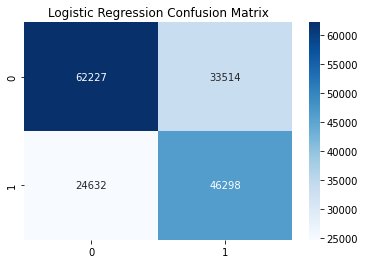

In [14]:
# Predict the labels of the test set
y_pred_lr = clf_lr.predict(X_test)

# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Display Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

import seaborn as sns
import matplotlib.pyplot as plt


labels = ['‘True Neg’','’False Pos’','’False Neg’','’True Pos’']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix_lr, annot=True, fmt='', cmap='Blues')

plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [15]:
# Print the spescificity
print(conf_matrix_lr[1,1]/(conf_matrix_lr[1,1] + conf_matrix_lr[0,1]))

0.5800882072871247


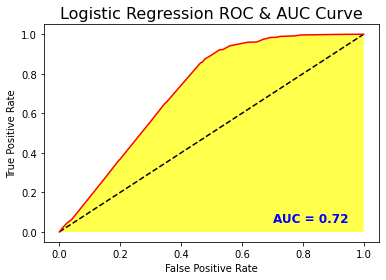

In [16]:
y_pred_prob_lr = clf_lr.predict_proba(X_test)[:,1]

# Define metrics
auc = metrics.roc_auc_score(y_test, y_pred_prob_lr)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_lr)

# Show visualize ROC & AUC Curve
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='XGBoost',color = "r")
plt.fill_between(fpr, tpr, facecolor='yellow', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.2f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC & AUC Curve',fontsize=16)
plt.show()

## Validation Data - Logistic Regression

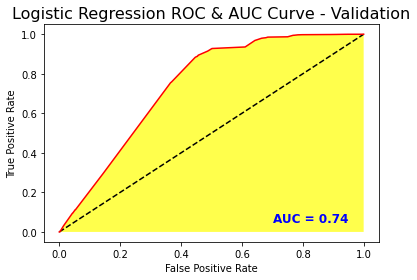

In [39]:
y_pred_prob_lr_zul = clf_lr.predict_proba(X_zul)[:,1]

# Define metrics
auc = metrics.roc_auc_score(y_zul, y_pred_prob_lr_zul)
fpr, tpr, thresholds = roc_curve(y_zul, y_pred_prob_lr_zul)

# Show visualize ROC & AUC Curve
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='XGBoost',color = "r")
plt.fill_between(fpr, tpr, facecolor='yellow', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.2f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC & AUC Curve - Validation',fontsize=16)
plt.show()

In [19]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.72      0.65      0.68     95741
           1       0.58      0.65      0.61     70930

    accuracy                           0.65    166671
   macro avg       0.65      0.65      0.65    166671
weighted avg       0.66      0.65      0.65    166671



## 5.1.2 XGBoost

In [25]:
# Import Xgboost Classifier
import xgboost as xgb

# Instantiate the classifier
clf_xgb = xgb.XGBClassifier()

# Fit to the training data
clf_xgb.fit(X_train, y_train)

# Compute accuracy
print(clf_xgb.score(X_test, y_test))

0.6767224052174643


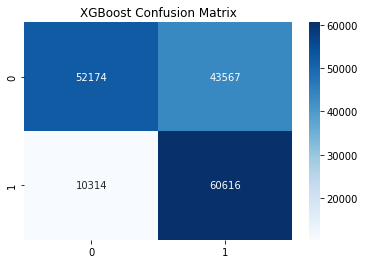

In [26]:
# Predict the labels of the test set
y_pred_xgb = clf_xgb.predict(X_test)

# Display Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

labels = ['‘True Neg’','’False Pos’','’False Neg’','’True Pos’']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='', cmap='Blues')

plt.title('XGBoost Confusion Matrix')
plt.show()

In [27]:
# Print the spescificity
print(conf_matrix_xgb[1,1]/(conf_matrix_xgb[1,1] + conf_matrix_xgb[0,1]))

0.5818223702523444


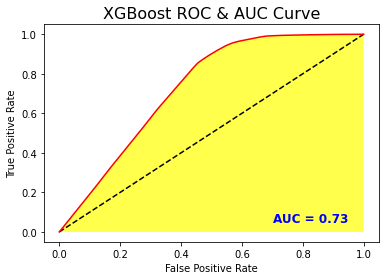

In [28]:
y_pred_prob_xgb = clf_xgb_tbest.predict_proba(X_test)[:,1]

# Define metrics
auc = metrics.roc_auc_score(y_test, y_pred_prob_xgb)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_xgb)

# Show visualize ROC & AUC Curve
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='XGBoost',color = "r")
plt.fill_between(fpr, tpr, facecolor='yellow', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.2f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC & AUC Curve',fontsize=16)
plt.show()

## Validation Data - XGBoost

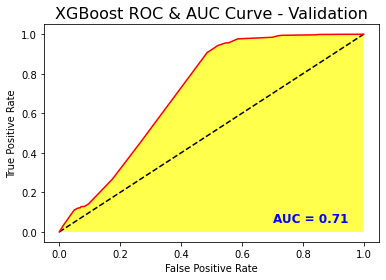

In [38]:
y_pred_prob_xzul = clf_xgb_tbest.predict_proba(X_zul)[:,1]

# Define metrics
auc = metrics.roc_auc_score(y_zul, y_pred_prob_xzul)
fpr, tpr, thresholds = roc_curve(y_zul, y_pred_prob_xzul)


# Show visualize ROC & AUC Curve
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='XGBoost',color = "r")
plt.fill_between(fpr, tpr, facecolor='yellow', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.2f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC & AUC Curve - Validation',fontsize=16)
plt.show()

In [30]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.83      0.54      0.66     95741
           1       0.58      0.85      0.69     70930

    accuracy                           0.68    166671
   macro avg       0.71      0.70      0.68    166671
weighted avg       0.73      0.68      0.67    166671



## 5.1.3 Deep Learning

In [88]:
from keras import regularizers
from tensorflow import keras
from tensorflow.keras import layers

In [495]:
# Let's count number of features and save it to a
a = X_train.columns.size

In [496]:
model_dp1 = keras.Sequential([
    #layer 1 / layer input
    layers.BatchNormalization(input_shape = [a]),
    #layer 2
    layers.Dense(70, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.15),
    #layer 3
    layers.Dense(50, activation='relu'),
    layers.BatchNormalization(),    
    layers.Dropout(0.15),
    #layer 4
    layers.Dense(25, activation='sigmoid'),
    layers.BatchNormalization(),
    layers.Dropout(0.15),
    #layer 5 / layer outout
    layers.Dense(len(y_test.columns), activation='sigmoid')
])

2022-11-17 13:02:52.859686: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [497]:
model_dp1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

2022-11-17 13:02:53.183220: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/150
12153/12153 [==============================] - 52s 4ms/step - loss: 0.5643 - accuracy: 0.6715 - val_loss: 0.5478 - val_accuracy: 0.6877
Epoch 2/150
12153/12153 [==============================] - 51s 4ms/step - loss: 0.5559 - accuracy: 0.6796 - val_loss: 0.5457 - val_accuracy: 0.6880
Epoch 3/150
12153/12153 [==============================] - 55s 5ms/step - loss: 0.5551 - accuracy: 0.6802 - val_loss: 0.5464 - val_accuracy: 0.6886
Epoch 4/150
12153/12153 [==============================] - 53s 4ms/step - loss: 0.5543 - accuracy: 0.6812 - val_loss: 0.5465 - val_accuracy: 0.6873
Epoch 5/150
12153/12153 [==============================] - 53s 4ms/step - loss: 0.5539 - accuracy: 0.6819 - val_loss: 0.5465 - val_accuracy: 0.6879
Epoch 6/150
12153/12153 [==============================] - 54s 4ms/step - loss: 0.5536 - accuracy: 0.6821 - val_loss: 0.5461 - val_accuracy: 0.6886
Epoch 7/150
12153/12153 [==============================] - 53s 4ms/step - loss: 0.5536 - accuracy: 0.6824 - val_

<AxesSubplot:title={'center':'Accuracy'}>

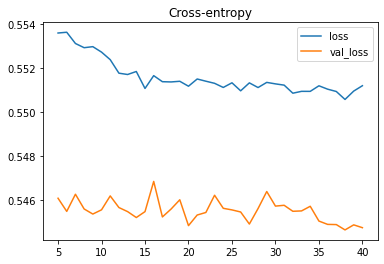

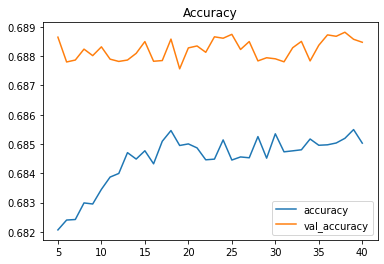

In [498]:
from matplotlib import pyplot as plt
early_stopping = keras.callbacks.EarlyStopping(
    patience= 40,
    min_delta=0.01,
    restore_best_weights=True,
    
)


history = model_dp1.fit( 
    X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=150, 
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[5:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

## 5.2 Date: 2020 - 06/2022

In [31]:
final_feature2 = final_feature[final_feature['created_at'] >= '2020']
final_feature2

,created_at,label_churn,label_total_amount,label_use_promo,label_shipment_fee,label_free_shipping_frequent,label_click_frequent
16,2020-01-01,0,1,1,2,2,1
17,2020-02-01,0,3,1,2,2,1
18,2020-03-01,0,1,1,1,2,1
19,2020-04-01,0,2,1,2,2,1
20,2020-05-01,0,2,1,1,2,1
...,...,...,...,...,...,...,...
555561,2020-01-01,1,1,1,1,1,1
555562,2020-07-01,1,3,1,2,2,1
555563,2021-01-01,1,2,1,2,2,1
555564,2021-07-01,1,2,1,1,1,2


In [47]:
#Split column, save it to X and Y
X = final_feature2.iloc[:, 2:]
y = final_feature2[['label_churn']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

## 5.2.1 Logistic Regression

In [48]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()

# Fit the classifier
clf_lr.fit(X_train, y_train)

# Compute accuracy
print(clf_lr.score(X_test, y_test))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6583557665361719


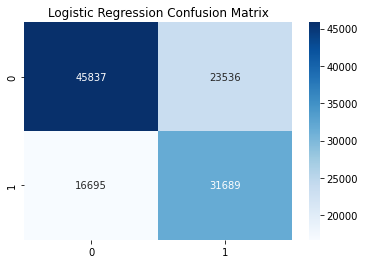

In [49]:
# Predict the labels of the test set
y_pred_lr = clf_lr.predict(X_test)

# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Display Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

import seaborn as sns
import matplotlib.pyplot as plt


labels = ['‘True Neg’','’False Pos’','’False Neg’','’True Pos’']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix_lr, annot=True, fmt='', cmap='Blues')

plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [50]:
# Print the spescificity
print(conf_matrix_lr[1,1]/(conf_matrix_lr[1,1] + conf_matrix_lr[0,1]))

0.573816206428248


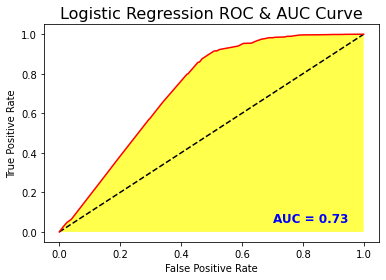

In [51]:
y_pred_prob_lr = clf_lr.predict_proba(X_test)[:,1]

# Define metrics
auc = metrics.roc_auc_score(y_test, y_pred_prob_lr)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_lr)

# Show visualize ROC & AUC Curve
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='XGBoost',color = "r")
plt.fill_between(fpr, tpr, facecolor='yellow', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.2f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC & AUC Curve',fontsize=16)
plt.show()

In [52]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.73      0.66      0.70     69373
           1       0.57      0.65      0.61     48384

    accuracy                           0.66    117757
   macro avg       0.65      0.66      0.65    117757
weighted avg       0.67      0.66      0.66    117757



## Validation Data - Logistic Regression

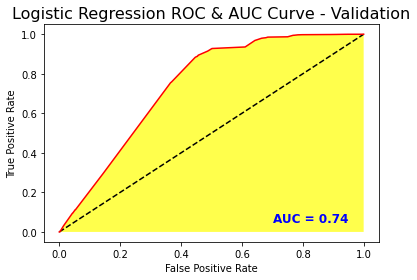

In [53]:
y_pred_prob_lr_zul = clf_lr.predict_proba(X_zul)[:,1]

# Define metrics
auc = metrics.roc_auc_score(y_zul, y_pred_prob_lr_zul)
fpr, tpr, thresholds = roc_curve(y_zul, y_pred_prob_lr_zul)

# Show visualize ROC & AUC Curve
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='XGBoost',color = "r")
plt.fill_between(fpr, tpr, facecolor='yellow', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.2f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC & AUC Curve - Validation',fontsize=16)
plt.show()

## 5.2.2 XGBoost

In [54]:
# Import Xgboost Classifier
import xgboost as xgb

# Instantiate the classifier
clf_xgb = xgb.XGBClassifier(min_child_weight = 2)

# Fit to the training data
clf_xgb.fit(X_train, y_train)

# Compute accuracy
print(clf_xgb.score(X_test, y_test))

0.6787452125988264


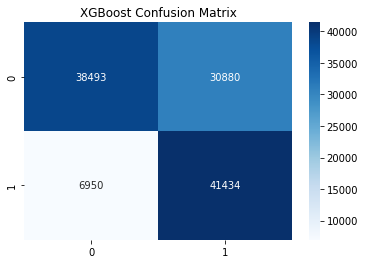

In [55]:
# Predict the labels of the test set
y_pred_xgb = clf_xgb.predict(X_test)

# Display Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

labels = ['‘True Neg’','’False Pos’','’False Neg’','’True Pos’']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='', cmap='Blues')

plt.title('XGBoost Confusion Matrix')
plt.show()

In [56]:
# Print the spescificity
print(conf_matrix_xgb[1,1]/(conf_matrix_xgb[1,1] + conf_matrix_xgb[0,1]))

0.572973421467489


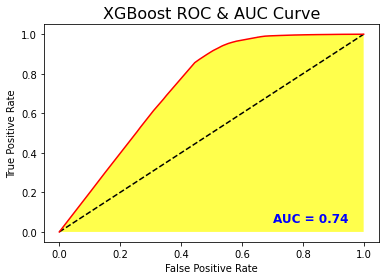

In [57]:
y_pred_prob_xgb = clf_xgb.predict_proba(X_test)[:,1]

# Define metrics
auc = metrics.roc_auc_score(y_test, y_pred_prob_xgb)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_xgb)

# Show visualize ROC & AUC Curve
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='XGBoost',color = "r")
plt.fill_between(fpr, tpr, facecolor='yellow', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.2f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC & AUC Curve',fontsize=16)
plt.show()

In [58]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.85      0.55      0.67     69373
           1       0.57      0.86      0.69     48384

    accuracy                           0.68    117757
   macro avg       0.71      0.71      0.68    117757
weighted avg       0.73      0.68      0.68    117757



## Validation Data – XGBoost

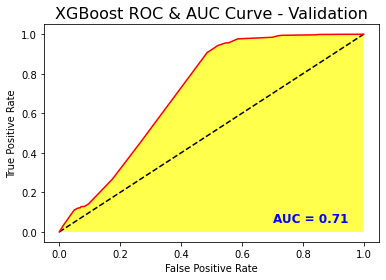

In [59]:
y_pred_prob_xzul = clf_xgb_tbest.predict_proba(X_zul)[:,1]

# Define metrics
auc = metrics.roc_auc_score(y_zul, y_pred_prob_xzul)
fpr, tpr, thresholds = roc_curve(y_zul, y_pred_prob_xzul)


# Show visualize ROC & AUC Curve
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='XGBoost',color = "r")
plt.fill_between(fpr, tpr, facecolor='yellow', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.2f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC & AUC Curve - Validation',fontsize=16)
plt.show()

## 5.2.3 Deep Learning

In [7]:
from keras import regularizers
from tensorflow import keras
from tensorflow.keras import layers

In [8]:
# Let's count number of features and save it to a
a = X_train.columns.size

In [9]:
model_dp1 = keras.Sequential([
    #layer 1 / layer input
    layers.BatchNormalization(input_shape = [a]),
    #layer 2
    layers.Dense(70, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.15),
    #layer 3
    layers.Dense(50, activation='relu'),
    layers.BatchNormalization(),    
    layers.Dropout(0.15),
    #layer 4
    layers.Dense(25, activation='sigmoid'),
    layers.BatchNormalization(),
    layers.Dropout(0.15),
    #layer 5 / layer outout
    #ganti Y_testpca dengan kolom target kalian.
    layers.Dense(len(y_test.columns), activation='sigmoid')
])

2022-12-05 11:57:35.258034: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [10]:
model_dp1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

2022-12-05 11:57:39.947511: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/150
12153/12153 [==============================] - 48s 4ms/step - loss: 0.5693 - accuracy: 0.6610 - val_loss: 0.5542 - val_accuracy: 0.6767
Epoch 2/150
12153/12153 [==============================] - 45s 4ms/step - loss: 0.5619 - accuracy: 0.6693 - val_loss: 0.5543 - val_accuracy: 0.6767
Epoch 3/150
12153/12153 [==============================] - 43s 4ms/step - loss: 0.5608 - accuracy: 0.6709 - val_loss: 0.5543 - val_accuracy: 0.6767
Epoch 4/150
12153/12153 [==============================] - 44s 4ms/step - loss: 0.5604 - accuracy: 0.6720 - val_loss: 0.5539 - val_accuracy: 0.6767
Epoch 5/150
12153/12153 [==============================] - 44s 4ms/step - loss: 0.5603 - accuracy: 0.6720 - val_loss: 0.5547 - val_accuracy: 0.6767
Epoch 6/150
12153/12153 [==============================] - 44s 4ms/step - loss: 0.5598 - accuracy: 0.6721 - val_loss: 0.5539 - val_accuracy: 0.6767
Epoch 7/150
12153/12153 [==============================] - 44s 4ms/step - loss: 0.5597 - accuracy: 0.6723 - val_

<AxesSubplot:title={'center':'Accuracy'}>

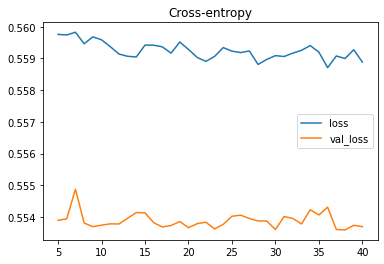

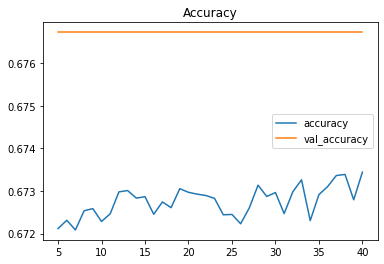

In [11]:
from matplotlib import pyplot as plt
early_stopping = keras.callbacks.EarlyStopping(
    patience= 40,
    min_delta=0.01,
    restore_best_weights=True,
    
)


history = model_dp1.fit( 
    X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=150, 
    callbacks=[early_stopping],
)


history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[5:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

## 5.3 Date: 2021 - 06/2022

In [12]:
final_feature3 = final_feature[final_feature['created_at'] >= '2021']
final_feature3

,created_at,label_churn,label_total_amount,label_use_promo,label_shipment_fee,label_free_shipping_frequent,label_click_frequent
28,2021-01-01,0,1,1,1,2,2
29,2021-02-01,0,1,1,2,2,1
30,2021-03-01,0,3,1,2,2,1
31,2021-04-01,0,2,1,2,2,1
32,2021-05-01,0,3,1,3,2,1
...,...,...,...,...,...,...,...
555555,2022-05-01,0,3,1,3,1,3
555556,2022-06-01,0,2,1,2,1,3
555563,2021-01-01,1,2,1,2,2,1
555564,2021-07-01,1,2,1,1,1,2


In [13]:
#Split column, save it to X and Y
X = final_feature3.iloc[:, 2:]
y = final_feature3[['label_churn']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

## 5.3.1 Logistic Regression

In [62]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()

# Fit the classifier
clf_lr.fit(X_train, y_train)

# Compute accuracy
print(clf_lr.score(X_test, y_test))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6616684575559246


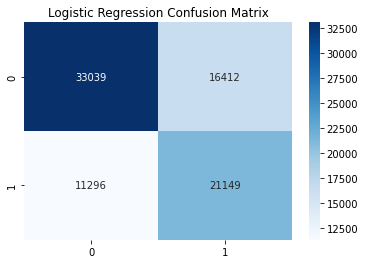

In [63]:
# Predict the labels of the test set
y_pred_lr = clf_lr.predict(X_test)

# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Display Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

import seaborn as sns
import matplotlib.pyplot as plt


labels = ['‘True Neg’','’False Pos’','’False Neg’','’True Pos’']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix_lr, annot=True, fmt='', cmap='Blues')

plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [64]:
# Print the spescificity
print(conf_matrix_lr[1,1]/(conf_matrix_lr[1,1] + conf_matrix_lr[0,1]))

0.5630574265860866


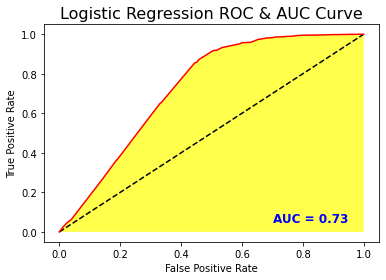

In [65]:
y_pred_prob_lr = clf_lr.predict_proba(X_test)[:,1]

# Define metrics
auc = metrics.roc_auc_score(y_test, y_pred_prob_lr)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_lr)

# Show visualize ROC & AUC Curve
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='XGBoost',color = "r")
plt.fill_between(fpr, tpr, facecolor='yellow', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.2f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC & AUC Curve',fontsize=16)
plt.show()

In [66]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.75      0.67      0.70     49451
           1       0.56      0.65      0.60     32445

    accuracy                           0.66     81896
   macro avg       0.65      0.66      0.65     81896
weighted avg       0.67      0.66      0.66     81896



## Validation Data - Logistic Regression

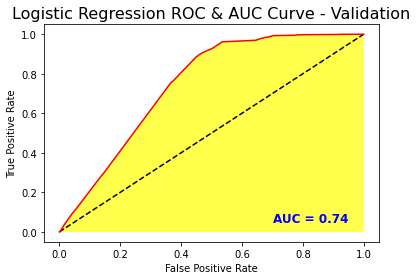

In [67]:
y_pred_prob_lr_zul = clf_lr.predict_proba(X_zul)[:,1]

# Define metrics
auc = metrics.roc_auc_score(y_zul, y_pred_prob_lr_zul)
fpr, tpr, thresholds = roc_curve(y_zul, y_pred_prob_lr_zul)

# Show visualize ROC & AUC Curve
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='XGBoost',color = "r")
plt.fill_between(fpr, tpr, facecolor='yellow', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.2f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC & AUC Curve - Validation',fontsize=16)
plt.show()

## 5.3.2 XGBoost

In [68]:
# Import Xgboost Classifier
import xgboost as xgb

# Instantiate the classifier
clf_xgb = xgb.XGBClassifier(min_child_weight = 2)

# Fit to the training data
clf_xgb.fit(X_train, y_train)

# Compute accuracy
print(clf_xgb_tbest.score(X_test, y_test))

0.6787999413890788


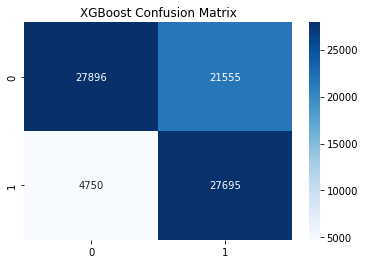

In [69]:
# Predict the labels of the test set
y_pred_xgb = clf_xgb.predict(X_test)

# Display Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

labels = ['‘True Neg’','’False Pos’','’False Neg’','’True Pos’']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='', cmap='Blues')

plt.title('XGBoost Confusion Matrix')
plt.show()

In [70]:
# Print the spescificity
print(conf_matrix_xgb[1,1]/(conf_matrix_xgb[1,1] + conf_matrix_xgb[0,1]))

0.5623350253807107


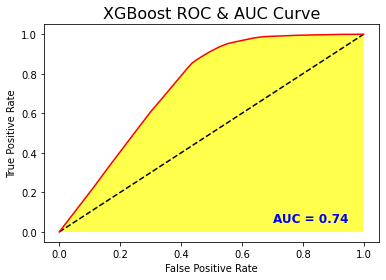

In [71]:
y_pred_prob_xgb = clf_xgb_tbest.predict_proba(X_test)[:,1]

# Define metrics
auc = metrics.roc_auc_score(y_test, y_pred_prob_xgb)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_xgb)

# Show visualize ROC & AUC Curve
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='XGBoost',color = "r")
plt.fill_between(fpr, tpr, facecolor='yellow', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.2f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC & AUC Curve',fontsize=16)
plt.show()

In [72]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.85      0.56      0.68     49451
           1       0.56      0.85      0.68     32445

    accuracy                           0.68     81896
   macro avg       0.71      0.71      0.68     81896
weighted avg       0.74      0.68      0.68     81896



## Validation Data – XGBoost

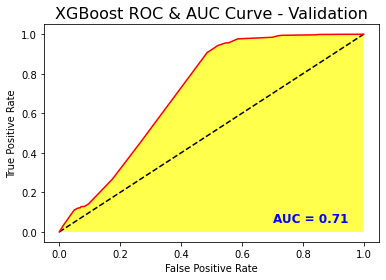

In [73]:
y_pred_prob_xzul = clf_xgb_tbest.predict_proba(X_zul)[:,1]

# Define metrics
auc = metrics.roc_auc_score(y_zul, y_pred_prob_xzul)
fpr, tpr, thresholds = roc_curve(y_zul, y_pred_prob_xzul)


# Show visualize ROC & AUC Curve
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='XGBoost',color = "r")
plt.fill_between(fpr, tpr, facecolor='yellow', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.2f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC & AUC Curve - Validation',fontsize=16)
plt.show()

## 5.3.3 Deep Learning

In [14]:
from keras import regularizers
from tensorflow import keras
from tensorflow.keras import layers

In [15]:
# Let's count number of features and save it to a
a = X_train.columns.size

In [16]:
model_dp1 = keras.Sequential([
    #layer 1 / layer input
    layers.BatchNormalization(input_shape = [a]),
    #layer 2
    layers.Dense(70, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.15),
    #layer 3
    layers.Dense(50, activation='relu'),
    layers.BatchNormalization(),    
    layers.Dropout(0.15),
    #layer 4
    layers.Dense(25, activation='sigmoid'),
    layers.BatchNormalization(),
    layers.Dropout(0.15),
    #layer 5 / layer outout
    #ganti Y_testpca dengan kolom target kalian.
    layers.Dense(len(y_test.columns), activation='sigmoid')
])

In [17]:
model_dp1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

Epoch 1/150
5972/5972 [==============================] - 24s 4ms/step - loss: 0.5614 - accuracy: 0.6607 - val_loss: 0.5454 - val_accuracy: 0.6788
Epoch 2/150
5972/5972 [==============================] - 23s 4ms/step - loss: 0.5519 - accuracy: 0.6679 - val_loss: 0.5444 - val_accuracy: 0.6766
Epoch 3/150
5972/5972 [==============================] - 22s 4ms/step - loss: 0.5516 - accuracy: 0.6699 - val_loss: 0.5443 - val_accuracy: 0.6788
Epoch 4/150
5972/5972 [==============================] - 23s 4ms/step - loss: 0.5501 - accuracy: 0.6719 - val_loss: 0.5455 - val_accuracy: 0.6766
Epoch 5/150
5972/5972 [==============================] - 23s 4ms/step - loss: 0.5497 - accuracy: 0.6720 - val_loss: 0.5441 - val_accuracy: 0.6788
Epoch 6/150
5972/5972 [==============================] - 23s 4ms/step - loss: 0.5489 - accuracy: 0.6736 - val_loss: 0.5438 - val_accuracy: 0.6788
Epoch 7/150
5972/5972 [==============================] - 22s 4ms/step - loss: 0.5491 - accuracy: 0.6744 - val_loss: 0.5444 -

<AxesSubplot:title={'center':'Accuracy'}>

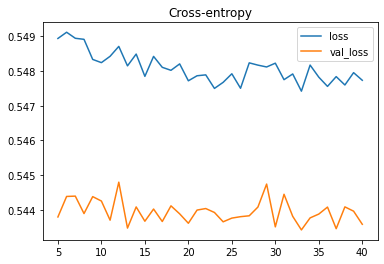

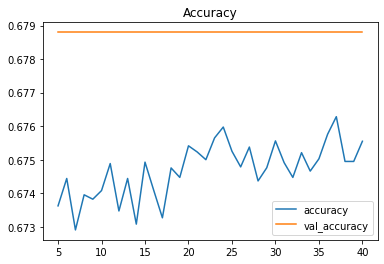

In [18]:
from matplotlib import pyplot as plt
early_stopping = keras.callbacks.EarlyStopping(
    patience= 40,
    min_delta=0.01,
    restore_best_weights=True,
    
)


history = model_dp1.fit( 
    X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=150, 
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[5:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

## 5.4 Date: 01/2022 - 06/2022

In [19]:
final_feature4 = final_feature[final_feature['created_at'] >= '2022']
final_feature4

,created_at,label_churn,label_total_amount,label_use_promo,label_shipment_fee,label_free_shipping_frequent,label_click_frequent
39,2022-01-01,0,2,1,1,1,1
40,2022-02-01,0,1,1,2,2,1
41,2022-03-01,0,3,1,1,1,1
42,2022-04-01,0,1,1,3,2,1
43,2022-05-01,0,3,1,3,2,1
...,...,...,...,...,...,...,...
555553,2022-03-01,0,3,1,3,2,2
555554,2022-04-01,0,3,1,2,1,1
555555,2022-05-01,0,3,1,3,1,3
555556,2022-06-01,0,2,1,2,1,3


In [20]:
#Split column, save it to X and Y
X = final_feature4.iloc[:, 2:]
y = final_feature4[['label_churn']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

## 5.4.1 Logistic Regression

In [76]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Hyperparameters from GridSearchCV
clf_lr = LogisticRegression()

# Fit the classifier
clf_lr.fit(X_train, y_train)

# Compute accuracy
print(clf_lr.score(X_test, y_test))

0.6682479749572401


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


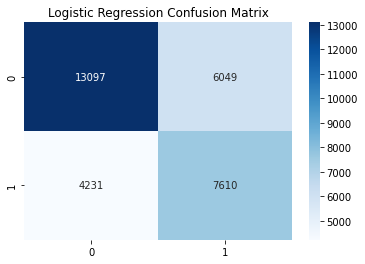

In [77]:
# Predict the labels of the test set
y_pred_lr = clf_lr.predict(X_test)

# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Display Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

import seaborn as sns
import matplotlib.pyplot as plt


labels = ['‘True Neg’','’False Pos’','’False Neg’','’True Pos’']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix_lr, annot=True, fmt='', cmap='Blues')

plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [78]:
# Print the spescificity
print(conf_matrix_lr[1,1]/(conf_matrix_lr[1,1] + conf_matrix_lr[0,1]))

0.5571418112599751


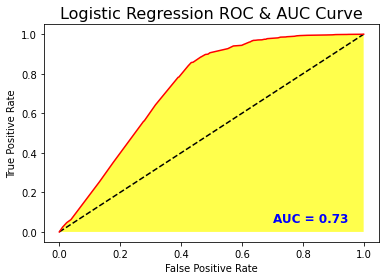

In [79]:
y_pred_prob_lr = clf_lr.predict_proba(X_test)[:,1]

# Define metrics
auc = metrics.roc_auc_score(y_test, y_pred_prob_lr)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_lr)

# Show visualize ROC & AUC Curve
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='XGBoost',color = "r")
plt.fill_between(fpr, tpr, facecolor='yellow', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.2f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC & AUC Curve',fontsize=16)
plt.show()

In [80]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72     19146
           1       0.56      0.64      0.60     11841

    accuracy                           0.67     30987
   macro avg       0.66      0.66      0.66     30987
weighted avg       0.68      0.67      0.67     30987



## Validation Data - Logistic Regression

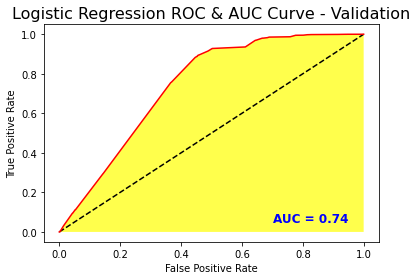

In [81]:
y_pred_prob_lr_zul = clf_lr.predict_proba(X_zul)[:,1]

# Define metrics
auc = metrics.roc_auc_score(y_zul, y_pred_prob_lr_zul)
fpr, tpr, thresholds = roc_curve(y_zul, y_pred_prob_lr_zul)

# Show visualize ROC & AUC Curve
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='XGBoost',color = "r")
plt.fill_between(fpr, tpr, facecolor='yellow', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.2f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC & AUC Curve - Validation',fontsize=16)
plt.show()

## 5.4.2 XGBoost

In [82]:
# Import Xgboost Classifier
import xgboost as xgb

# Instantiate the classifier
clf_xgb = xgb.XGBClassifier(min_child_weight = 2)

# Fit to the training data
clf_xgb.fit(X_train, y_train)

# Compute accuracy
print(clf_xgb.score(X_test, y_test))

0.6818343176170653


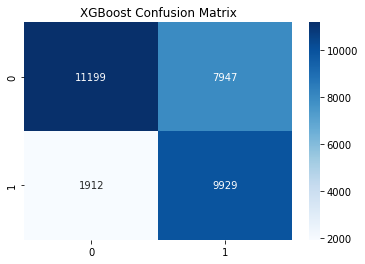

In [83]:
# Predict the labels of the test set
y_pred_xgb = clf_xgb.predict(X_test)

# Display Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

labels = ['‘True Neg’','’False Pos’','’False Neg’','’True Pos’']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='', cmap='Blues')

plt.title('XGBoost Confusion Matrix')
plt.show()

In [84]:
# Print the spescificity
print(conf_matrix_xgb[1,1]/(conf_matrix_xgb[1,1] + conf_matrix_xgb[0,1]))

0.5554374580443052


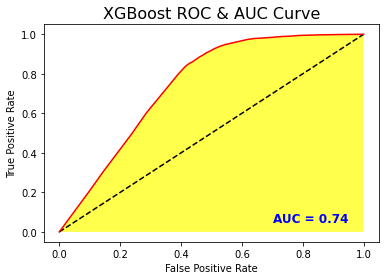

In [85]:
y_pred_prob_xgb = clf_xgb.predict_proba(X_test)[:,1]

# Define metrics
auc = metrics.roc_auc_score(y_test, y_pred_prob_xgb)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_xgb)

# Show visualize ROC & AUC Curve
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='XGBoost',color = "r")
plt.fill_between(fpr, tpr, facecolor='yellow', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.2f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC & AUC Curve',fontsize=16)
plt.show()

In [86]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.85      0.58      0.69     19146
           1       0.56      0.84      0.67     11841

    accuracy                           0.68     30987
   macro avg       0.70      0.71      0.68     30987
weighted avg       0.74      0.68      0.68     30987



## Validation Data – XGBoost

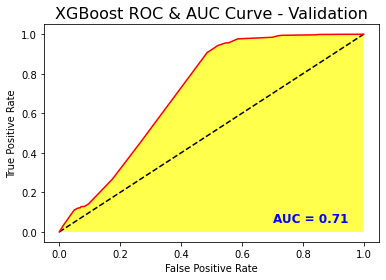

In [87]:
y_pred_prob_xzul = clf_xgb_tbest.predict_proba(X_zul)[:,1]

# Define metrics
auc = metrics.roc_auc_score(y_zul, y_pred_prob_xzul)
fpr, tpr, thresholds = roc_curve(y_zul, y_pred_prob_xzul)


# Show visualize ROC & AUC Curve
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='XGBoost',color = "r")
plt.fill_between(fpr, tpr, facecolor='yellow', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.2f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC & AUC Curve - Validation',fontsize=16)
plt.show()

## 5.4.3 Deep Learning

In [21]:
from keras import regularizers
from tensorflow import keras
from tensorflow.keras import layers

In [22]:
# Let's count number of features and save it to a
a = X_train.columns.size

In [23]:
model_dp1 = keras.Sequential([
    #layer 1 / layer input
    layers.BatchNormalization(input_shape = [a]),
    #layer 2
    layers.Dense(70, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.15),
    #layer 3
    layers.Dense(50, activation='relu'),
    layers.BatchNormalization(),    
    layers.Dropout(0.15),
    #layer 4
    layers.Dense(25, activation='sigmoid'),
    layers.BatchNormalization(),
    layers.Dropout(0.15),
    #layer 5 / layer outout
    #ganti Y_testpca dengan kolom target kalian.
    layers.Dense(len(y_test.columns), activation='sigmoid')
])

In [24]:
model_dp1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

Epoch 1/150
2260/2260 [==============================] - 10s 4ms/step - loss: 0.5700 - accuracy: 0.6578 - val_loss: 0.5449 - val_accuracy: 0.6791
Epoch 2/150
2260/2260 [==============================] - 9s 4ms/step - loss: 0.5531 - accuracy: 0.6661 - val_loss: 0.5423 - val_accuracy: 0.6724
Epoch 3/150
2260/2260 [==============================] - 9s 4ms/step - loss: 0.5504 - accuracy: 0.6707 - val_loss: 0.5411 - val_accuracy: 0.6818
Epoch 4/150
2260/2260 [==============================] - 9s 4ms/step - loss: 0.5495 - accuracy: 0.6707 - val_loss: 0.5418 - val_accuracy: 0.6818
Epoch 5/150
2260/2260 [==============================] - 9s 4ms/step - loss: 0.5500 - accuracy: 0.6697 - val_loss: 0.5412 - val_accuracy: 0.6815
Epoch 6/150
2260/2260 [==============================] - 8s 4ms/step - loss: 0.5470 - accuracy: 0.6723 - val_loss: 0.5425 - val_accuracy: 0.6791
Epoch 7/150
2260/2260 [==============================] - 8s 4ms/step - loss: 0.5482 - accuracy: 0.6724 - val_loss: 0.5415 - val_a

<AxesSubplot:title={'center':'Accuracy'}>

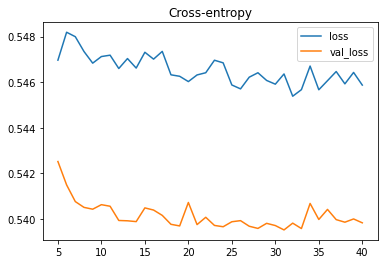

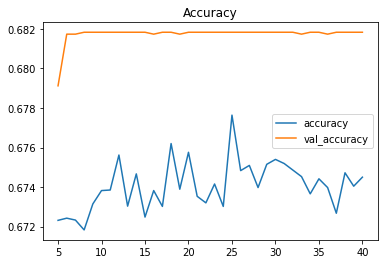

In [25]:
from matplotlib import pyplot as plt
early_stopping = keras.callbacks.EarlyStopping(
    patience= 40,
    min_delta=0.01,
    restore_best_weights=True,
    
)


history = model_dp1.fit( 
    X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=150, 
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[5:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

## Conclusion Model
The best model we can get is Logistic Regression with range date between 2016 and 06/2022 with ROC-UAC Score (Training & Testing) 0.72 and ROC-UAC Score (Validation) 0.74